In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json
from selenium import webdriver
from lxml import etree
import os
from os import path
import shutil
import time
import demjson
from selenium.webdriver.chrome.options import Options
from multiprocessing.dummy import Pool

In [2]:
def getResponse(url):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'
    }
    response = requests.get(url=url, headers=headers)
    return response

In [3]:
def getText(url):
    response = getResponse(url)
    response.encoding = 'utf-8'
    return response.text

In [4]:
# 需要selenium
# https://v.jin10.com/list.html?cate=57
# https://v.jin10.com/details.html?id=14225
# https://jin10videoserver.jin10.com/Act-ss-mp4-hd/349a0c96db6249f2b418907f96d421a9/hzstt2021.mp4

<html lang="zh-CN"><head><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    </style><style class="vjs-styles-dimensions">
      .vjs_video_3-dimensions {
        width: 1280px;
        height: 720px;
      }

      .vjs_video_3-dimensions.vjs-fluid {
        padding-top: 56.25%;
      }
    </style>
    <meta charset="UTF-8">
    <title>私下的基金经理们原来是这样的！</title>
    <meta name="description" content="私下的基金经理们原来是这样的！">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no">
    <meta name="renderer" content="webkit">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
    <meta name="csrf-token" content="">
    <link href="//cdn.jin10.com/assets/img/commons/favicon.ico" type="image/x-icon" rel="icon">
    <link rel="stylesheet" type="text/css" href="//cdn.jin10.com/assets/
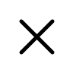
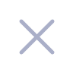
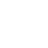
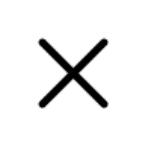
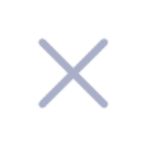
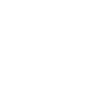
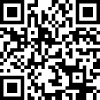

In [19]:
url = 'https://v.jin10.com/details.html?id=14225'
chrome_options =Options()
chrome_options.add_argument('--headless')
browser = webdriver.Chrome(options=chrome_options)
browser.get(url)
time.sleep(2)
page_text = browser.page_source
print(page_text)

In [22]:
tree = etree.HTML(page_text)
src = tree.xpath('//*[@id="vjs_video_3_html5_api"]/@src')[0]
print(src)

https://jin10videoserver.jin10.com/Act-ss-mp4-hd/349a0c96db6249f2b418907f96d421a9/hzstt2021.mp4


In [5]:
def getVideoSrc(url):
    chrome_options =Options()
    chrome_options.add_argument('--headless')
    browser = webdriver.Chrome(options=chrome_options)
    browser.get(url)
    time.sleep(3)
    page_text = browser.page_source
    tree = etree.HTML(page_text)
    src = tree.xpath('//*[@id="vjs_video_3_html5_api"]/@src')
    if len(src) == 0:
        return ""
    return src[0]

In [24]:
print(getVideoSrc('https://v.jin10.com/details.html?id=14196'))

https://jin10videoserver.jin10.com/Act-ss-mp4-hd/588695e4b5934a8eaca06e54bdd03a36/hizhishutiantuan4.mp4


In [6]:
# 下载视频
def download(url):
    try:
        src = getVideoSrc(url)
        if src == "":
            print("error")
            return
        path = 'E:/work/video/'
        fileName = '_'.join(src.split('/')[-2:])
        content = getResponse(src).content
        with open(path + fileName, 'wb') as fp:
            fp.write(content)
        print(fileName, "successful")
    except Exception as e:
        print('exception')

In [20]:
download('https://v.jin10.com/details.html?id=14196')

588695e4b5934a8eaca06e54bdd03a36_hizhishutiantuan4.mp4 successful


In [7]:
# 获取视频播放页
def getPageUrl(url):
    chrome_options =Options()
    chrome_options.add_argument('--headless')
    browser = webdriver.Chrome(options=chrome_options)
    browser.get(url)
    time.sleep(3)
    page_text = browser.page_source
    tree = etree.HTML(page_text)
    allLi = tree.xpath('//div[@class="jin-video-list"]/ul/li')
    #print(len(allLi))
    linkList = []
    for li in allLi:
        pageUrl = li.xpath('./a/@href')[0]
        #print(pageUrl)
        linkList.append('https://v.jin10.com' + pageUrl)
    return linkList

In [39]:
# 将所有地址写入文件
fp = open('pageUrl.txt', 'w', encoding='utf-8')

In [40]:
# 嗨，指数天团
linkList = getPageUrl('https://v.jin10.com/list.html?cate=57')
text = '\n'.join(linkList)
print(text)
fp.write(text)
fp.write('\n')

https://v.jin10.com/details.html?id=14225
https://v.jin10.com/details.html?id=14226
https://v.jin10.com/details.html?id=14196
https://v.jin10.com/details.html?id=14181
https://v.jin10.com/details.html?id=14145
https://v.jin10.com/details.html?id=14100


1

In [42]:
#海外交易员观点
# https://v.jin10.com/list.html?cate=55&p=1
# https://v.jin10.com/list.html?cate=55&p=32

for i in range(1, 33):
    url = f'https://v.jin10.com/list.html?cate=55&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15154
https://v.jin10.com/details.html?id=15153
https://v.jin10.com/details.html?id=15151
https://v.jin10.com/details.html?id=15150
https://v.jin10.com/details.html?id=15142
https://v.jin10.com/details.html?id=15140
https://v.jin10.com/details.html?id=15139
https://v.jin10.com/details.html?id=15138
https://v.jin10.com/details.html?id=15125
https://v.jin10.com/details.html?id=15124
https://v.jin10.com/details.html?id=15123
https://v.jin10.com/details.html?id=15122
https://v.jin10.com/details.html?id=15121
https://v.jin10.com/details.html?id=15120
https://v.jin10.com/details.html?id=15119
https://v.jin10.com/details.html?id=15103
https://v.jin10.com/details.html?id=15102
https://v.jin10.com/details.html?id=15101
https://v.jin10.com/details.html?id=15100
https://v.jin10.com/details.html?id=15099
https://v.jin10.com/details.html?id=15097
https://v.jin10.com/details.html?id=15096
https://v.jin10.com/details.html?id=15095
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=14665
https://v.jin10.com/details.html?id=14664
https://v.jin10.com/details.html?id=14663
https://v.jin10.com/details.html?id=14662
https://v.jin10.com/details.html?id=14660
https://v.jin10.com/details.html?id=14659
https://v.jin10.com/details.html?id=14654
https://v.jin10.com/details.html?id=14653
https://v.jin10.com/details.html?id=14652
https://v.jin10.com/details.html?id=14651
https://v.jin10.com/details.html?id=14648
https://v.jin10.com/details.html?id=14647
https://v.jin10.com/details.html?id=14644
https://v.jin10.com/details.html?id=14646
https://v.jin10.com/details.html?id=14645
https://v.jin10.com/details.html?id=14643
https://v.jin10.com/details.html?id=14641
https://v.jin10.com/details.html?id=14642
https://v.jin10.com/details.html?id=14640
https://v.jin10.com/details.html?id=14638
https://v.jin10.com/details.html?id=14636
https://v.jin10.com/details.html?id=14624
https://v.jin10.com/details.html?id=14623
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=14153
https://v.jin10.com/details.html?id=14155
https://v.jin10.com/details.html?id=14154
https://v.jin10.com/details.html?id=14152
https://v.jin10.com/details.html?id=14151
https://v.jin10.com/details.html?id=14148
https://v.jin10.com/details.html?id=14144
https://v.jin10.com/details.html?id=14140
https://v.jin10.com/details.html?id=14137
https://v.jin10.com/details.html?id=14136
https://v.jin10.com/details.html?id=14134
https://v.jin10.com/details.html?id=14132
https://v.jin10.com/details.html?id=14127
https://v.jin10.com/details.html?id=14126
https://v.jin10.com/details.html?id=14124
https://v.jin10.com/details.html?id=14125
https://v.jin10.com/details.html?id=14122
https://v.jin10.com/details.html?id=14121
https://v.jin10.com/details.html?id=14118
https://v.jin10.com/details.html?id=14117
https://v.jin10.com/details.html?id=14115
https://v.jin10.com/details.html?id=14107
https://v.jin10.com/details.html?id=14105
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=13647
https://v.jin10.com/details.html?id=13645
https://v.jin10.com/details.html?id=13641
https://v.jin10.com/details.html?id=13632
https://v.jin10.com/details.html?id=13631
https://v.jin10.com/details.html?id=13630
https://v.jin10.com/details.html?id=13629
https://v.jin10.com/details.html?id=13616
https://v.jin10.com/details.html?id=13615
https://v.jin10.com/details.html?id=13614
https://v.jin10.com/details.html?id=13610
https://v.jin10.com/details.html?id=13595
https://v.jin10.com/details.html?id=13593
https://v.jin10.com/details.html?id=13590
https://v.jin10.com/details.html?id=13582
https://v.jin10.com/details.html?id=13581
https://v.jin10.com/details.html?id=13572
https://v.jin10.com/details.html?id=13566
https://v.jin10.com/details.html?id=13559
https://v.jin10.com/details.html?id=13555
https://v.jin10.com/details.html?id=13553
https://v.jin10.com/details.html?id=13539
https://v.jin10.com/details.html?id=13534
https://v.jin10.com/details.html?i

In [43]:
# yy黄金圈
# https://v.jin10.com/list.html?cate=56&p=3

for i in range(1, 4):
    url = f'https://v.jin10.com/list.html?cate=56&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15026
https://v.jin10.com/details.html?id=14938
https://v.jin10.com/details.html?id=14912
https://v.jin10.com/details.html?id=14878
https://v.jin10.com/details.html?id=14775
https://v.jin10.com/details.html?id=14721
https://v.jin10.com/details.html?id=14655
https://v.jin10.com/details.html?id=14621
https://v.jin10.com/details.html?id=14602
https://v.jin10.com/details.html?id=14535
https://v.jin10.com/details.html?id=14500
https://v.jin10.com/details.html?id=14443
https://v.jin10.com/details.html?id=14405
https://v.jin10.com/details.html?id=14382
https://v.jin10.com/details.html?id=14356
https://v.jin10.com/details.html?id=14342
https://v.jin10.com/details.html?id=14329
https://v.jin10.com/details.html?id=14301
https://v.jin10.com/details.html?id=14280
https://v.jin10.com/details.html?id=14272
https://v.jin10.com/details.html?id=14259
https://v.jin10.com/details.html?id=14252
https://v.jin10.com/details.html?id=14250
https://v.jin10.com/details.html?i

In [44]:
# 交易学院
# https://v.jin10.com/list.html?cate=41&p=4

for i in range(1, 5):
    url = f'https://v.jin10.com/list.html?cate=41&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15144
https://v.jin10.com/details.html?id=15109
https://v.jin10.com/details.html?id=15106
https://v.jin10.com/details.html?id=15093
https://v.jin10.com/details.html?id=15088
https://v.jin10.com/details.html?id=15079
https://v.jin10.com/details.html?id=15057
https://v.jin10.com/details.html?id=15043
https://v.jin10.com/details.html?id=15027
https://v.jin10.com/details.html?id=15003
https://v.jin10.com/details.html?id=14993
https://v.jin10.com/details.html?id=14989
https://v.jin10.com/details.html?id=14983
https://v.jin10.com/details.html?id=14963
https://v.jin10.com/details.html?id=14941
https://v.jin10.com/details.html?id=14931
https://v.jin10.com/details.html?id=14930
https://v.jin10.com/details.html?id=14913
https://v.jin10.com/details.html?id=14910
https://v.jin10.com/details.html?id=14879
https://v.jin10.com/details.html?id=14861
https://v.jin10.com/details.html?id=14851
https://v.jin10.com/details.html?id=14829
https://v.jin10.com/details.html?i

In [45]:
# 金十早知道
# https://v.jin10.com/list.html?cate=21&p=22

for i in range(1, 5):
    url = f'https://v.jin10.com/list.html?cate=21&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15152
https://v.jin10.com/details.html?id=15114
https://v.jin10.com/details.html?id=15087
https://v.jin10.com/details.html?id=15062
https://v.jin10.com/details.html?id=15036
https://v.jin10.com/details.html?id=15013
https://v.jin10.com/details.html?id=14992
https://v.jin10.com/details.html?id=14968
https://v.jin10.com/details.html?id=14939
https://v.jin10.com/details.html?id=14920
https://v.jin10.com/details.html?id=14899
https://v.jin10.com/details.html?id=14859
https://v.jin10.com/details.html?id=14833
https://v.jin10.com/details.html?id=14810
https://v.jin10.com/details.html?id=14786
https://v.jin10.com/details.html?id=14760
https://v.jin10.com/details.html?id=14732
https://v.jin10.com/details.html?id=14706
https://v.jin10.com/details.html?id=14680
https://v.jin10.com/details.html?id=14661
https://v.jin10.com/details.html?id=14635
https://v.jin10.com/details.html?id=14609
https://v.jin10.com/details.html?id=14585
https://v.jin10.com/details.html?i

In [46]:
# 脱水期货
# https://v.jin10.com/list.html?cate=31&p=19

for i in range(1, 20):
    url = f'https://v.jin10.com/list.html?cate=31&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15129
https://v.jin10.com/details.html?id=15098
https://v.jin10.com/details.html?id=15070
https://v.jin10.com/details.html?id=15045
https://v.jin10.com/details.html?id=15019
https://v.jin10.com/details.html?id=14997
https://v.jin10.com/details.html?id=14975
https://v.jin10.com/details.html?id=14945
https://v.jin10.com/details.html?id=14924
https://v.jin10.com/details.html?id=14901
https://v.jin10.com/details.html?id=14868
https://v.jin10.com/details.html?id=14836
https://v.jin10.com/details.html?id=14814
https://v.jin10.com/details.html?id=14794
https://v.jin10.com/details.html?id=14769
https://v.jin10.com/details.html?id=14739
https://v.jin10.com/details.html?id=14712
https://v.jin10.com/details.html?id=14697
https://v.jin10.com/details.html?id=14685
https://v.jin10.com/details.html?id=14626
https://v.jin10.com/details.html?id=14618
https://v.jin10.com/details.html?id=14597
https://v.jin10.com/details.html?id=14572
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=11933
https://v.jin10.com/details.html?id=11928
https://v.jin10.com/details.html?id=11919
https://v.jin10.com/details.html?id=11911
https://v.jin10.com/details.html?id=11904
https://v.jin10.com/details.html?id=11894
https://v.jin10.com/details.html?id=11887
https://v.jin10.com/details.html?id=11881
https://v.jin10.com/details.html?id=11876
https://v.jin10.com/details.html?id=11866
https://v.jin10.com/details.html?id=11853
https://v.jin10.com/details.html?id=11846
https://v.jin10.com/details.html?id=11835
https://v.jin10.com/details.html?id=11827
https://v.jin10.com/details.html?id=11819
https://v.jin10.com/details.html?id=11802
https://v.jin10.com/details.html?id=11793
https://v.jin10.com/details.html?id=11785
https://v.jin10.com/details.html?id=11776
https://v.jin10.com/details.html?id=11757
https://v.jin10.com/details.html?id=11747
https://v.jin10.com/details.html?id=11733
https://v.jin10.com/details.html?id=11722
https://v.jin10.com/details.html?i

In [47]:
# 金十坊谈间
# https://v.jin10.com/list.html?cate=30&p=2

for i in range(1, 5):
    url = f'https://v.jin10.com/list.html?cate=30&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15078
https://v.jin10.com/details.html?id=15029
https://v.jin10.com/details.html?id=14982
https://v.jin10.com/details.html?id=14848
https://v.jin10.com/details.html?id=14701
https://v.jin10.com/details.html?id=14603
https://v.jin10.com/details.html?id=13803
https://v.jin10.com/details.html?id=13785
https://v.jin10.com/details.html?id=12287
https://v.jin10.com/details.html?id=10658
https://v.jin10.com/details.html?id=10098
https://v.jin10.com/details.html?id=10061
https://v.jin10.com/details.html?id=10026
https://v.jin10.com/details.html?id=5369
https://v.jin10.com/details.html?id=5274
https://v.jin10.com/details.html?id=5185
https://v.jin10.com/details.html?id=4951
https://v.jin10.com/details.html?id=4882
https://v.jin10.com/details.html?id=4789
https://v.jin10.com/details.html?id=4754
https://v.jin10.com/details.html?id=4648
https://v.jin10.com/details.html?id=4606
https://v.jin10.com/details.html?id=4536
https://v.jin10.com/details.html?id=4166
htt

In [48]:
# 交易树洞
# https://v.jin10.com/list.html?cate=50

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=50'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=14305
https://v.jin10.com/details.html?id=14128
https://v.jin10.com/details.html?id=14013
https://v.jin10.com/details.html?id=13909
https://v.jin10.com/details.html?id=13783
https://v.jin10.com/details.html?id=13714
https://v.jin10.com/details.html?id=13378
https://v.jin10.com/details.html?id=13171
https://v.jin10.com/details.html?id=12509
https://v.jin10.com/details.html?id=12490
https://v.jin10.com/details.html?id=12460
https://v.jin10.com/details.html?id=12436
https://v.jin10.com/details.html?id=12385
https://v.jin10.com/details.html?id=12306
https://v.jin10.com/details.html?id=12286
https://v.jin10.com/details.html?id=12257
https://v.jin10.com/details.html?id=12228
https://v.jin10.com/details.html?id=12205
https://v.jin10.com/details.html?id=12187
https://v.jin10.com/details.html?id=12149
https://v.jin10.com/details.html?id=12132
https://v.jin10.com/details.html?id=12120
https://v.jin10.com/details.html?id=12070
https://v.jin10.com/details.html?i

In [49]:
# 一航说数据
# https://v.jin10.com/list.html?cate=51&p=3

for i in range(1, 4):
    url = f'https://v.jin10.com/list.html?cate=51&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15157
https://v.jin10.com/details.html?id=15038
https://v.jin10.com/details.html?id=14869
https://v.jin10.com/details.html?id=14747
https://v.jin10.com/details.html?id=14625
https://v.jin10.com/details.html?id=14586
https://v.jin10.com/details.html?id=14486
https://v.jin10.com/details.html?id=14404
https://v.jin10.com/details.html?id=14335
https://v.jin10.com/details.html?id=14284
https://v.jin10.com/details.html?id=14254
https://v.jin10.com/details.html?id=14245
https://v.jin10.com/details.html?id=14201
https://v.jin10.com/details.html?id=14185
https://v.jin10.com/details.html?id=14119
https://v.jin10.com/details.html?id=14094
https://v.jin10.com/details.html?id=14022
https://v.jin10.com/details.html?id=13988
https://v.jin10.com/details.html?id=13943
https://v.jin10.com/details.html?id=13894
https://v.jin10.com/details.html?id=13867
https://v.jin10.com/details.html?id=13831
https://v.jin10.com/details.html?id=13813
https://v.jin10.com/details.html?i

In [50]:
# 美股极客
# https://v.jin10.com/list.html?cate=54

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=54'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=14347
https://v.jin10.com/details.html?id=14313
https://v.jin10.com/details.html?id=14242
https://v.jin10.com/details.html?id=14177
https://v.jin10.com/details.html?id=14110
https://v.jin10.com/details.html?id=14075
https://v.jin10.com/details.html?id=13998
https://v.jin10.com/details.html?id=13906
https://v.jin10.com/details.html?id=13837
https://v.jin10.com/details.html?id=13690
https://v.jin10.com/details.html?id=13600
https://v.jin10.com/details.html?id=13509
https://v.jin10.com/details.html?id=13465
https://v.jin10.com/details.html?id=13431
https://v.jin10.com/details.html?id=13368
https://v.jin10.com/details.html?id=13317
https://v.jin10.com/details.html?id=13269
https://v.jin10.com/details.html?id=13252


In [51]:
# 金十译讯
# https://v.jin10.com/list.html?cate=10&p=8

for i in range(1, 9):
    url = f'https://v.jin10.com/list.html?cate=10&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=14627
https://v.jin10.com/details.html?id=14114
https://v.jin10.com/details.html?id=14061
https://v.jin10.com/details.html?id=13597
https://v.jin10.com/details.html?id=13288
https://v.jin10.com/details.html?id=13200
https://v.jin10.com/details.html?id=13196
https://v.jin10.com/details.html?id=13056
https://v.jin10.com/details.html?id=13039
https://v.jin10.com/details.html?id=12824
https://v.jin10.com/details.html?id=12470
https://v.jin10.com/details.html?id=12376
https://v.jin10.com/details.html?id=12372
https://v.jin10.com/details.html?id=12159
https://v.jin10.com/details.html?id=12110
https://v.jin10.com/details.html?id=12109
https://v.jin10.com/details.html?id=12012
https://v.jin10.com/details.html?id=11871
https://v.jin10.com/details.html?id=11869
https://v.jin10.com/details.html?id=11868
https://v.jin10.com/details.html?id=11867
https://v.jin10.com/details.html?id=11485
https://v.jin10.com/details.html?id=11474
https://v.jin10.com/details.html?i

In [52]:
# 财经不眠姐
# https://v.jin10.com/list.html?cate=49&p=3

for i in range(1, 4):
    url = f'https://v.jin10.com/list.html?cate=49&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=15011
https://v.jin10.com/details.html?id=14455
https://v.jin10.com/details.html?id=14337
https://v.jin10.com/details.html?id=14223
https://v.jin10.com/details.html?id=14079
https://v.jin10.com/details.html?id=13910
https://v.jin10.com/details.html?id=13840
https://v.jin10.com/details.html?id=13822
https://v.jin10.com/details.html?id=13793
https://v.jin10.com/details.html?id=13692
https://v.jin10.com/details.html?id=13606
https://v.jin10.com/details.html?id=13596
https://v.jin10.com/details.html?id=13485
https://v.jin10.com/details.html?id=13454
https://v.jin10.com/details.html?id=13407
https://v.jin10.com/details.html?id=13397
https://v.jin10.com/details.html?id=13374
https://v.jin10.com/details.html?id=13346
https://v.jin10.com/details.html?id=13322
https://v.jin10.com/details.html?id=13279
https://v.jin10.com/details.html?id=13140
https://v.jin10.com/details.html?id=13106
https://v.jin10.com/details.html?id=13060
https://v.jin10.com/details.html?i

In [53]:
# 财经十一问
# https://v.jin10.com/list.html?cate=53

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=53'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=13260
https://v.jin10.com/details.html?id=13259
https://v.jin10.com/details.html?id=13258
https://v.jin10.com/details.html?id=13228
https://v.jin10.com/details.html?id=13227
https://v.jin10.com/details.html?id=13226
https://v.jin10.com/details.html?id=13225
https://v.jin10.com/details.html?id=13211
https://v.jin10.com/details.html?id=13207
https://v.jin10.com/details.html?id=13197
https://v.jin10.com/details.html?id=13188


In [54]:
# 交易女神经
# https://v.jin10.com/list.html?cate=45

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=45'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=11468
https://v.jin10.com/details.html?id=11438
https://v.jin10.com/details.html?id=11406
https://v.jin10.com/details.html?id=11377
https://v.jin10.com/details.html?id=11348


In [55]:
# 进击吧女神
# https://v.jin10.com/list.html?cate=46

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=46'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=12093
https://v.jin10.com/details.html?id=12063
https://v.jin10.com/details.html?id=12041
https://v.jin10.com/details.html?id=12016
https://v.jin10.com/details.html?id=11987
https://v.jin10.com/details.html?id=11750
https://v.jin10.com/details.html?id=11693
https://v.jin10.com/details.html?id=11667
https://v.jin10.com/details.html?id=11631
https://v.jin10.com/details.html?id=11612
https://v.jin10.com/details.html?id=11588
https://v.jin10.com/details.html?id=11568
https://v.jin10.com/details.html?id=11539
https://v.jin10.com/details.html?id=11538


In [56]:
# 伦敦交易者
# https://v.jin10.com/list.html?cate=44

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=44'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=13028
https://v.jin10.com/details.html?id=11218
https://v.jin10.com/details.html?id=11066
https://v.jin10.com/details.html?id=11009
https://v.jin10.com/details.html?id=10701
https://v.jin10.com/details.html?id=10526
https://v.jin10.com/details.html?id=10478
https://v.jin10.com/details.html?id=10447
https://v.jin10.com/details.html?id=10424
https://v.jin10.com/details.html?id=10396
https://v.jin10.com/details.html?id=10374
https://v.jin10.com/details.html?id=10348
https://v.jin10.com/details.html?id=10313
https://v.jin10.com/details.html?id=10293
https://v.jin10.com/details.html?id=10268
https://v.jin10.com/details.html?id=10258


In [57]:
# 数据可视化
# https://v.jin10.com/list.html?cate=47&p=15

for i in range(1, 16):
    url = f'https://v.jin10.com/list.html?cate=47&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=14972
https://v.jin10.com/details.html?id=14971
https://v.jin10.com/details.html?id=14919
https://v.jin10.com/details.html?id=14918
https://v.jin10.com/details.html?id=14867
https://v.jin10.com/details.html?id=14866
https://v.jin10.com/details.html?id=14650
https://v.jin10.com/details.html?id=14649
https://v.jin10.com/details.html?id=14546
https://v.jin10.com/details.html?id=14545
https://v.jin10.com/details.html?id=14286
https://v.jin10.com/details.html?id=14285
https://v.jin10.com/details.html?id=14283
https://v.jin10.com/details.html?id=14282
https://v.jin10.com/details.html?id=14203
https://v.jin10.com/details.html?id=14167
https://v.jin10.com/details.html?id=14109
https://v.jin10.com/details.html?id=14078
https://v.jin10.com/details.html?id=14017
https://v.jin10.com/details.html?id=13972
https://v.jin10.com/details.html?id=13874
https://v.jin10.com/details.html?id=13870
https://v.jin10.com/details.html?id=13760
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=10831
https://v.jin10.com/details.html?id=10830
https://v.jin10.com/details.html?id=10829
https://v.jin10.com/details.html?id=10828
https://v.jin10.com/details.html?id=10827
https://v.jin10.com/details.html?id=10826
https://v.jin10.com/details.html?id=10825
https://v.jin10.com/details.html?id=10824
https://v.jin10.com/details.html?id=10823
https://v.jin10.com/details.html?id=10822
https://v.jin10.com/details.html?id=10723
https://v.jin10.com/details.html?id=10817
https://v.jin10.com/details.html?id=10814
https://v.jin10.com/details.html?id=10812
https://v.jin10.com/details.html?id=10811
https://v.jin10.com/details.html?id=10810
https://v.jin10.com/details.html?id=10809
https://v.jin10.com/details.html?id=10808
https://v.jin10.com/details.html?id=10807
https://v.jin10.com/details.html?id=10806
https://v.jin10.com/details.html?id=10805
https://v.jin10.com/details.html?id=10804
https://v.jin10.com/details.html?id=10803
https://v.jin10.com/details.html?i

In [58]:
# 合作案例
# https://v.jin10.com/list.html?cate=48

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=48'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=14970
https://v.jin10.com/details.html?id=14550
https://v.jin10.com/details.html?id=14547
https://v.jin10.com/details.html?id=14303
https://v.jin10.com/details.html?id=14295
https://v.jin10.com/details.html?id=14292
https://v.jin10.com/details.html?id=14291
https://v.jin10.com/details.html?id=14290
https://v.jin10.com/details.html?id=14289
https://v.jin10.com/details.html?id=13251
https://v.jin10.com/details.html?id=12715
https://v.jin10.com/details.html?id=11929
https://v.jin10.com/details.html?id=11741
https://v.jin10.com/details.html?id=11732
https://v.jin10.com/details.html?id=11731
https://v.jin10.com/details.html?id=11717
https://v.jin10.com/details.html?id=11716
https://v.jin10.com/details.html?id=11715
https://v.jin10.com/details.html?id=11714
https://v.jin10.com/details.html?id=11713
https://v.jin10.com/details.html?id=11712
https://v.jin10.com/details.html?id=11711
https://v.jin10.com/details.html?id=11657
https://v.jin10.com/details.html?i

In [59]:
# 老板说得对
# https://v.jin10.com/list.html?cate=32&p=29

for i in range(1, 30):
    url = f'https://v.jin10.com/list.html?cate=32&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=14850
https://v.jin10.com/details.html?id=14849
https://v.jin10.com/details.html?id=14828
https://v.jin10.com/details.html?id=14827
https://v.jin10.com/details.html?id=14826
https://v.jin10.com/details.html?id=14777
https://v.jin10.com/details.html?id=14776
https://v.jin10.com/details.html?id=14531
https://v.jin10.com/details.html?id=14530
https://v.jin10.com/details.html?id=14464
https://v.jin10.com/details.html?id=14463
https://v.jin10.com/details.html?id=14408
https://v.jin10.com/details.html?id=14407
https://v.jin10.com/details.html?id=14324
https://v.jin10.com/details.html?id=14323
https://v.jin10.com/details.html?id=14322
https://v.jin10.com/details.html?id=14311
https://v.jin10.com/details.html?id=14310
https://v.jin10.com/details.html?id=14278
https://v.jin10.com/details.html?id=14271
https://v.jin10.com/details.html?id=14270
https://v.jin10.comjavascript:;
https://v.jin10.com/details.html?id=14236
https://v.jin10.com/details.html?id=14235
ht

https://v.jin10.com/details.html?id=11621
https://v.jin10.com/details.html?id=11619
https://v.jin10.com/details.html?id=11618
https://v.jin10.com/details.html?id=11617
https://v.jin10.com/details.html?id=11250
https://v.jin10.com/details.html?id=11249
https://v.jin10.com/details.html?id=11195
https://v.jin10.com/details.html?id=11185
https://v.jin10.com/details.html?id=11180
https://v.jin10.com/details.html?id=11163
https://v.jin10.com/details.html?id=11141
https://v.jin10.com/details.html?id=11123
https://v.jin10.com/details.html?id=11110
https://v.jin10.com/details.html?id=11109
https://v.jin10.com/details.html?id=11100
https://v.jin10.com/details.html?id=11079
https://v.jin10.com/details.html?id=11072
https://v.jin10.com/details.html?id=11071
https://v.jin10.com/details.html?id=11065
https://v.jin10.com/details.html?id=11056
https://v.jin10.com/details.html?id=11048
https://v.jin10.com/details.html?id=11047
https://v.jin10.com/details.html?id=11033
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=5458
https://v.jin10.com/details.html?id=5454
https://v.jin10.com/details.html?id=5449
https://v.jin10.com/details.html?id=5448
https://v.jin10.com/details.html?id=5441
https://v.jin10.com/details.html?id=5435
https://v.jin10.com/details.html?id=5434
https://v.jin10.com/details.html?id=5430
https://v.jin10.com/details.html?id=5424
https://v.jin10.com/details.html?id=5423
https://v.jin10.com/details.html?id=5422
https://v.jin10.com/details.html?id=5385
https://v.jin10.com/details.html?id=5374
https://v.jin10.com/details.html?id=5365
https://v.jin10.com/details.html?id=5364
https://v.jin10.com/details.html?id=5343
https://v.jin10.com/details.html?id=5341
https://v.jin10.com/details.html?id=5335
https://v.jin10.com/details.html?id=5334
https://v.jin10.com/details.html?id=5331
https://v.jin10.com/details.html?id=5330
https://v.jin10.com/details.html?id=5313
https://v.jin10.com/details.html?id=5306
https://v.jin10.com/details.html?id=5282
https://v.jin10.

In [60]:
# 期货阿汤哥
# https://v.jin10.com/list.html?cate=52

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=52'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=12847
https://v.jin10.com/details.html?id=12747
https://v.jin10.com/details.html?id=12692
https://v.jin10.com/details.html?id=12631
https://v.jin10.com/details.html?id=12566
https://v.jin10.com/details.html?id=12542
https://v.jin10.com/details.html?id=12459
https://v.jin10.com/details.html?id=12397
https://v.jin10.com/details.html?id=12319


In [61]:
# 华尔街时刻
# https://v.jin10.com/list.html?cate=16&p=13

for i in range(1, 2):
    url = f'https://v.jin10.com/list.html?cate=16&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=11360
https://v.jin10.com/details.html?id=11306
https://v.jin10.com/details.html?id=11289
https://v.jin10.com/details.html?id=11268
https://v.jin10.com/details.html?id=11241
https://v.jin10.com/details.html?id=11236
https://v.jin10.com/details.html?id=11201
https://v.jin10.com/details.html?id=11167
https://v.jin10.com/details.html?id=11146
https://v.jin10.com/details.html?id=11134
https://v.jin10.com/details.html?id=11126
https://v.jin10.com/details.html?id=11106
https://v.jin10.com/details.html?id=11092
https://v.jin10.com/details.html?id=11082
https://v.jin10.com/details.html?id=11060
https://v.jin10.com/details.html?id=11052
https://v.jin10.com/details.html?id=11043
https://v.jin10.com/details.html?id=11020
https://v.jin10.com/details.html?id=11006
https://v.jin10.com/details.html?id=10997
https://v.jin10.com/details.html?id=10974
https://v.jin10.com/details.html?id=10965
https://v.jin10.com/details.html?id=10936
https://v.jin10.com/details.html?i

In [62]:
# 财经街坊
# https://v.jin10.com/list.html?cate=17&p=39

for i in range(1, 40):
    url = f'https://v.jin10.com/list.html?cate=17&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=13821
https://v.jin10.com/details.html?id=11271
https://v.jin10.com/details.html?id=11272
https://v.jin10.com/details.html?id=11291
https://v.jin10.com/details.html?id=11270
https://v.jin10.com/details.html?id=11261
https://v.jin10.com/details.html?id=11242
https://v.jin10.com/details.html?id=11233
https://v.jin10.com/details.html?id=11212
https://v.jin10.com/details.html?id=11186
https://v.jin10.com/details.html?id=11143
https://v.jin10.com/details.html?id=11138
https://v.jin10.com/details.html?id=11118
https://v.jin10.com/details.html?id=11103
https://v.jin10.com/details.html?id=11093
https://v.jin10.com/details.html?id=11070
https://v.jin10.com/details.html?id=11057
https://v.jin10.com/details.html?id=11053
https://v.jin10.com/details.html?id=11004
https://v.jin10.com/details.html?id=10995
https://v.jin10.com/details.html?id=10962
https://v.jin10.com/details.html?id=10955
https://v.jin10.comjavascript:;
https://v.jin10.com/details.html?id=10942
ht

https://v.jin10.com/details.html?id=4482
https://v.jin10.com/details.html?id=4470
https://v.jin10.com/details.html?id=4441
https://v.jin10.com/details.html?id=4434
https://v.jin10.com/details.html?id=4427
https://v.jin10.com/details.html?id=4413
https://v.jin10.com/details.html?id=4388
https://v.jin10.com/details.html?id=4380
https://v.jin10.com/details.html?id=4366
https://v.jin10.com/details.html?id=4348
https://v.jin10.com/details.html?id=4335
https://v.jin10.com/details.html?id=4319
https://v.jin10.com/details.html?id=4311
https://v.jin10.com/details.html?id=4299
https://v.jin10.com/details.html?id=4282
https://v.jin10.com/details.html?id=4274
https://v.jin10.com/details.html?id=4252
https://v.jin10.com/details.html?id=4245
https://v.jin10.com/details.html?id=4235
https://v.jin10.com/details.html?id=4221
https://v.jin10.com/details.html?id=4212
https://v.jin10.com/details.html?id=4200
https://v.jin10.com/details.html?id=4191
https://v.jin10.com/details.html?id=4179
https://v.jin10.

https://v.jin10.com/details.html?id=2750
https://v.jin10.com/details.html?id=2748
https://v.jin10.com/details.html?id=2741
https://v.jin10.com/details.html?id=2737
https://v.jin10.com/details.html?id=2735
https://v.jin10.com/details.html?id=2729
https://v.jin10.com/details.html?id=2726
https://v.jin10.com/details.html?id=2719
https://v.jin10.com/details.html?id=2716
https://v.jin10.com/details.html?id=2714
https://v.jin10.com/details.html?id=2710
https://v.jin10.com/details.html?id=2706
https://v.jin10.com/details.html?id=2698
https://v.jin10.com/details.html?id=2691
https://v.jin10.com/details.html?id=2689
https://v.jin10.com/details.html?id=2682
https://v.jin10.com/details.html?id=2680
https://v.jin10.com/details.html?id=2676
https://v.jin10.com/details.html?id=2668
https://v.jin10.com/details.html?id=2665
https://v.jin10.com/details.html?id=2662
https://v.jin10.com/details.html?id=2657
https://v.jin10.com/details.html?id=2651
https://v.jin10.com/details.html?id=2647
https://v.jin10.

https://v.jin10.com/details.html?id=1952
https://v.jin10.com/details.html?id=1948
https://v.jin10.com/details.html?id=1945
https://v.jin10.com/details.html?id=1942
https://v.jin10.com/details.html?id=1935
https://v.jin10.com/details.html?id=1932
https://v.jin10.com/details.html?id=1928
https://v.jin10.com/details.html?id=1924
https://v.jin10.com/details.html?id=1918
https://v.jin10.com/details.html?id=1915
https://v.jin10.com/details.html?id=1910
https://v.jin10.com/details.html?id=1908
https://v.jin10.com/details.html?id=1904
https://v.jin10.com/details.html?id=1901
https://v.jin10.com/details.html?id=1896
https://v.jin10.com/details.html?id=1893
https://v.jin10.com/details.html?id=1888
https://v.jin10.com/details.html?id=1884
https://v.jin10.com/details.html?id=1882
https://v.jin10.com/details.html?id=1881
https://v.jin10.com/details.html?id=1880
https://v.jin10.com/details.html?id=1879
https://v.jin10.com/details.html?id=1869
https://v.jin10.com/details.html?id=1864
https://v.jin10.

In [63]:
# 唠车少女
# https://v.jin10.com/list.html?cate=34&p=3

for i in range(1, 4):
    url = f'https://v.jin10.com/list.html?cate=34&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=11300
https://v.jin10.com/details.html?id=11299
https://v.jin10.com/details.html?id=11297
https://v.jin10.com/details.html?id=11191
https://v.jin10.com/details.html?id=11190
https://v.jin10.com/details.html?id=10641
https://v.jin10.com/details.html?id=10639
https://v.jin10.com/details.html?id=10640
https://v.jin10.com/details.html?id=10638
https://v.jin10.com/details.html?id=10637
https://v.jin10.com/details.html?id=10636
https://v.jin10.com/details.html?id=10635
https://v.jin10.com/details.html?id=10633
https://v.jin10.com/details.html?id=10632
https://v.jin10.com/details.html?id=10631
https://v.jin10.com/details.html?id=10630
https://v.jin10.com/details.html?id=10629
https://v.jin10.com/details.html?id=10585
https://v.jin10.com/details.html?id=10338
https://v.jin10.com/details.html?id=10337
https://v.jin10.com/details.html?id=10336
https://v.jin10.com/details.html?id=10334
https://v.jin10.com/details.html?id=10407
https://v.jin10.comjavascript:;
ht

In [64]:
# 交易嘻游记
# https://v.jin10.com/list.html?cate=40

for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=40'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=4469
https://v.jin10.com/details.html?id=4412
https://v.jin10.com/details.html?id=4334
https://v.jin10.com/details.html?id=4263
https://v.jin10.com/details.html?id=4211
https://v.jin10.com/details.html?id=4156
https://v.jin10.com/details.html?id=4131
https://v.jin10.com/details.html?id=4089


In [65]:
# 八周交易计划
# https://v.jin10.com/list.html?cate=22
for i in range(1, 2):
    url = 'https://v.jin10.com/list.html?cate=22'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=1872
https://v.jin10.com/details.html?id=1854
https://v.jin10.com/details.html?id=1795
https://v.jin10.com/details.html?id=1778
https://v.jin10.com/details.html?id=1749
https://v.jin10.com/details.html?id=1729
https://v.jin10.com/details.html?id=1706
https://v.jin10.com/details.html?id=1685
https://v.jin10.com/details.html?id=1663
https://v.jin10.com/details.html?id=1636
https://v.jin10.com/details.html?id=1561
https://v.jin10.com/details.html?id=1509
https://v.jin10.com/details.html?id=1485
https://v.jin10.com/details.html?id=1473
https://v.jin10.com/details.html?id=1033
https://v.jin10.com/details.html?id=1024
https://v.jin10.com/details.html?id=1010
https://v.jin10.com/details.html?id=1002
https://v.jin10.com/details.html?id=978
https://v.jin10.com/details.html?id=973
https://v.jin10.com/details.html?id=960
https://v.jin10.com/details.html?id=948
https://v.jin10.com/details.html?id=937


In [66]:
# 财经balal
# https://v.jin10.com/list.html?cate=9&p=5
for i in range(1, 6):
    url = f'https://v.jin10.com/list.html?cate=9&p={i}'
    linkList = getPageUrl(url)
    text = '\n'.join(linkList)
    print(text)
    fp.write(text)
    fp.write('\n')

https://v.jin10.com/details.html?id=2695
https://v.jin10.com/details.html?id=2674
https://v.jin10.com/details.html?id=2655
https://v.jin10.com/details.html?id=2633
https://v.jin10.com/details.html?id=2605
https://v.jin10.com/details.html?id=2584
https://v.jin10.com/details.html?id=2574
https://v.jin10.com/details.html?id=2559
https://v.jin10.com/details.html?id=2546
https://v.jin10.com/details.html?id=2531
https://v.jin10.com/details.html?id=2513
https://v.jin10.com/details.html?id=2494
https://v.jin10.com/details.html?id=2478
https://v.jin10.com/details.html?id=2464
https://v.jin10.com/details.html?id=2448
https://v.jin10.com/details.html?id=2427
https://v.jin10.com/details.html?id=2408
https://v.jin10.com/details.html?id=2389
https://v.jin10.com/details.html?id=2369
https://v.jin10.com/details.html?id=2344
https://v.jin10.com/details.html?id=2327
https://v.jin10.com/details.html?id=2308
https://v.jin10.com/details.html?id=2288
https://v.jin10.com/details.html?id=2273
https://v.jin10.

In [67]:
fp.close()

In [8]:
linkList = []
with open('pageUrl.txt', 'r') as fp:
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.replace('\n', '')
        print(line)
        linkList.append(line)

https://v.jin10.com/details.html?id=14225
https://v.jin10.com/details.html?id=14226
https://v.jin10.com/details.html?id=14196
https://v.jin10.com/details.html?id=14181
https://v.jin10.com/details.html?id=14145
https://v.jin10.com/details.html?id=14100
https://v.jin10.com/details.html?id=15154
https://v.jin10.com/details.html?id=15153
https://v.jin10.com/details.html?id=15151
https://v.jin10.com/details.html?id=15150
https://v.jin10.com/details.html?id=15142
https://v.jin10.com/details.html?id=15140
https://v.jin10.com/details.html?id=15139
https://v.jin10.com/details.html?id=15138
https://v.jin10.com/details.html?id=15125
https://v.jin10.com/details.html?id=15124
https://v.jin10.com/details.html?id=15123
https://v.jin10.com/details.html?id=15122
https://v.jin10.com/details.html?id=15121
https://v.jin10.com/details.html?id=15120
https://v.jin10.com/details.html?id=15119
https://v.jin10.com/details.html?id=15103
https://v.jin10.com/details.html?id=15102
https://v.jin10.com/details.html?i

https://v.jin10.com/details.html?id=1387
https://v.jin10.com/details.html?id=1386
https://v.jin10.com/details.html?id=1378
https://v.jin10.com/details.html?id=1374
https://v.jin10.com/details.html?id=1368
https://v.jin10.com/details.html?id=1365
https://v.jin10.com/details.html?id=1359
https://v.jin10.com/details.html?id=1354
https://v.jin10.com/details.html?id=1351
https://v.jin10.com/details.html?id=1346
https://v.jin10.com/details.html?id=1343
https://v.jin10.com/details.html?id=1335
https://v.jin10.com/details.html?id=1326
https://v.jin10.com/details.html?id=1325
https://v.jin10.com/details.html?id=1318
https://v.jin10.com/details.html?id=1317
https://v.jin10.com/details.html?id=1313
https://v.jin10.com/details.html?id=1305
https://v.jin10.com/details.html?id=1303
https://v.jin10.com/details.html?id=1296
https://v.jin10.com/details.html?id=1295
https://v.jin10.com/details.html?id=1291
https://v.jin10.com/details.html?id=1274
https://v.jin10.com/details.html?id=1277
https://v.jin10.

In [9]:
print(len(linkList))

3724


In [24]:
thisPart = linkList[:1000]
print(len(thisPart))

1000


In [10]:
pool = Pool(4)
pool.map(download, linkList)
pool.close()
pool.join()

1d0b59eec2204ddd88db6b9c82d15576_20210312LinNZD.mp4 successful
bde3fefb461840c48a8678cac17ee5b4_20210119-AUD.mp4 successful
89ecc93374e44aa5849b55a507e32ecb_normal%20video-1222.mp4 successful
0110e2acaee344c8ab7638d9c149317c_20210118-USDJPY.mp4 successful
98712a2e22e14fe4b885a1490c795801_0312lingelidxy.mp4 successful
349a0c96db6249f2b418907f96d421a9_hzstt2021.mp4 successful
5334128e10b84c029465e871cdd4056a_0312atelasixau.mp4 successful
4b76368e057f44749e2048ab6125b21d_0312%20eur.mp4 successful
ffe7e15511e1437ebabf5d6c9636b93b_normal%20video--1221.mp4 successful
d03c3d7f88234704ba3dca3ed56e50d6_20210312wanzd.mp4 successful
06c7dfa005a4479d9852a6812effaaf3_tianhongjijing05.mp4 successful
mp4MultibitrateIn72_20210118-04.mp4 successful
f89ed66670dd4c08afb75c2c379274f2_0302%20ukoil.mp4 successful
8f769a499b6a4539b07461d63f40c8b4_normal%20video-1218.mp4 successful
48b3e01babe347b0ad87c1e48cfc0351_202103111818.mp4 successful
96599766983c49ca825fe0f812320cd5_normal%20video-1217.mp4 successful


d9d3b079a003483bbe7b96d50013d75f_0409aptmaud.mp4 successful
3302c6cfcd3b4eb4a4f0107fdc008044_4.9cui.mp4 successful
21c0697d5dd549bc8c4070dde96d6b15_202104091420.mp4 successful
cf118ac05da24ab4a2143f9f81c250a6_0409wxlxau.mp4 successful
mp4MultibitrateIn72_jpylingrid12.mp4 successful
90d6286cf02c4cffaadb788bfb3b92ad_0409Alan%EF%BC%88%E7%89%87%E5%B0%BE%E4%BA%8C%E7%BB%B4%E7%A0%81%EF%BC%89.mp4 successful
63f8d11448834e638715770bd962144c_0409%20XAG%20plancton.mp4 successful
b809814718e14c93af192c1e44cbd2ad_202104081831.mp4 successful
160b18e95cee47a1857038968c8aac73_202104081834.mp4 successful
mp4MultibitrateIn72_goldvasily.mp4 successful
c6b042050bb64a7ca33d3097b95fde9c_0408ymbtc.mp4 successful
6c6a212f44eb4bdd9008cbd2ec51f87a_0408%20XAU%20lingrid.mp4 successful
8bfe74d8a2ef45d18884f202ca13973f_20210111-USD.mp4 successful
705b7efc4d344db595b7e5d750c14f5d_202104081652.mp4 successful
TVLive_0408-jiemin.mp4 successful
e303295dcdb243ce8192739638f3425b_0408%20AUD%20lingrid.mp4 successful
88cec9e

60b50bc6a7f0428297927bfd4f3621a7_Linaud.mp4 successful
7dc7ab65376c4f83892347db8e99582e_0401lglxau.mp4 successful
01c421d334f6487fae9e2a5972729692_20201230-euro1.mp4 successful
b6010c3a139a4d30aa82f38ef74c5eb8_0226%20xau2.mp4 successful
06d8e34fd1274faaaf7014efc7291651_0401%20EUR%20lingrid.mp4 successful
9fb7ffdabd5940efbc8d4248fdc7526a_0226%20xau.mp4 successful
be345c858a1a41edb848675d8b60e94e_20210401ticad.mp4 successful
b7d539111c0c4a0f9e7c5c91866756ad_202102261631.mp4 successful
mp4MultibitrateIn72_30gbp.mp4 successful
9c0ffa408f8c48a19d93f165dfc71beb_202104011624.mp4 successful
568ef0f32ee2427c9d7276aa9ff26ae0_lingelieur.mp4 successful
3b027594e5fb41e5ace14e4499bec1d3_20201230-euro.mp4 successful
6155e96957ca4930aac3544100615249_202104011BTC.mp4 successful
90b3e3e20ad54d91810a20a206ec9905_ligelinzd.mp4 successful
8dcedcdbdbf444f7b55aa37bdbc9a91b_20210401MMBeur.mp4 successful
76bfcadf2e704b28a6e4d94a0dcca6c4_0226%20usdjpy.mp4 successful
328910766818459baa5215286dd81a81_0331dglmxau.

5bce0321b37f4c4997e0cb634a7560f9_0325%20XAU%20plancton.mp4 successful
mp4MultibitrateIn72_bbbbbbbb.mp4 successful
8e9a7cc9124d4f7c8b752df6a3db0f9f_202103241807.mp4 successful
e5f94f4a87104d88bdf85d8667233fe0_20201222-01.mp4 successful
52ec8749e6324fc6a91df1e4aa071035_0324%20XAU%20Degram.mp4 successful
1c4fe1d6c0004916938cb2b71a070bf9_20201222-dollar.mp4 successful
bfce3c5ab0e14d8b9e7ff168435d1c03_20210324DInzd.mp4 successful
27df616020d642d29cde2011700556b2_20201222-gold.mp4 successful
0f124144ec9b4cafb9774c156401b85e_0324%20DXY%20degram.mp4 successful
4fb89ba7264f4cda993c955320729663_20210324Linxau.mp4 successful
4cb6f79b201a42b18f9f28919c5dd835_202102221535%281%29.mp4 successful
2efcbbff6c8841b8accea8c563588b84_0324%20EUR%20lingrid.mp4 successful
7edb3ee3ce7b43b0b5d8ab778f1df741_0222%20xau.mp4 successful
50aa964782bf4f8c91f8387cb03de545_0323%E6%9D%B0%E6%98%8E%E7%9B%B4%E6%92%AD%E9%AB%98%E6%B8%85for%E4%B8%BB%E7%AB%99%E5%9B%9E%E6%94%BE-%E5%90%AB%E7%89%87%E5%A4%B4%E5%B0%BE.mp4 successful

dd1e7410faef44b0bc557927877c7a7e_20210201-gold.mp4 successful
f39e51d1a44e4c8685168e4ad7fc0a11_20210201ouyuan.mp4 successful
009c5243eea940caa5f52821fc4b4901_20201214-DXY.mp4 successful
mp4MultibitrateIn72_20210201gbp.mp4 successful
4f12d099d8444a35aa06c0ef8a00ae5b_2.26%E5%B4%94.mp4 successful
mp4MultibitrateIn72_aud.mov successful
bfc0a1bdd8714931a7a4658b3708c3bd_20210201-EURGBP.mp4 successful
6ad261afd1004e6196bf3266474be838_20210319Waeurgbp.mp4 successful
1bb54b6c06db4d06a60865bf61f457b1_1211gold.mp4 successful
fe425d8761434cb9a0d2ecbcfd742dbe_20210129-01.mp4 successful
137368e8b6f24f538c881bbb6db3c277_0319%20AUD.mp4 successful
1818652b7aa6472db33789c6fa1f437b_20201211.mp4 successful
7fc77ae4aa0b4d18844c3cb72d2c9828_20210129.mp4 successful
mp4MultibitrateIn72_20201210-04.mov successful
mp4MultibitrateIn72_20210129-01.mp4 successful
32fd8438435748b7bc6d0fd6211bf8f3_20201210-gold.mp4 successful
e38b97bf21a946138f6245d02bd2e896_20210129-euro.mp4 successful
3f9f7df8f3cd4ebebd410d9bcc98d

4f3004cf1fc149c0824896687244b13e_20210121-UADCAD.mp4 successful
7d22f16debc14109b7284a52a316fb32_20210121-dxy.mp4 successful
717a83b5bc584c5cbe1bbc58c14d98e6_normal%20video-0308.mp4 successful
653abfb02e6d454dbdc9365bbb6f8000_20210121-eur.mp4 successful
df5baaa5c4ad495a8deb120bd86ae1f5_20210121-gold.mp4 successful
73356744febd4dd3a64acc56cad397e1_normal%20video-0305.mp4 successful
7fd5918eb7154d5786092991c752098c_20210121-usdjpy.mp4 successful
30e945ac1b4449148eba80384c9bafe4_20210120-AUD.mp4 successful
afff95c809d64428843a8aac5740a2d0_20210120-gold.mp4 successful
f842af16dee0457282bd66cbc39d1661_normal%20video-0302.mp4 successful
eecc7c1005f247959a93cd75e86a4f06_202103171542.mp4 successful
ba6a2afbc5bd405fa408753465775e44_normal%20video-0226.mp4 successful
mp4MultibitrateIn72_20210120-03.mp4 successful
b2a9e7023c6e4e9aab187d4e4ba077c6_0317%20btc.mp4 successful
1354b6e9a9c843c3947292caf41fb17c_200110-jieming-live.mp4 successful
d71544a9796b45fa842e0c3719bcaed0_0317waxilidxy.mp4 success

5c7968e849934dbebb1d8326bf5943b5_ImportVideo_459512.209484--0106.mp4 successful
b9fcc6fe24204a0d8200529eddcec294_1217%E7%9B%B4%E6%92%AD.mp4 successful
cae840e94b644035a6351c7d0bce5e4d_20200313tsqhv.mp4 successful
a8a12a92fc454f3296ee12f7fc2af457_20200312tsqhv.mp4 successful
7c638598bec942a880d0b06a5eec99d4_20200311tsqhv.mp4 successful
d7c17e2bd4334dd3b42bf7dc58a6fc7e_20200310tsqhv.mp4 successful
d9831304f5144521a93a2f409b315fa6_20200309tsqhv.mp4 successful
b831603093c048f0afa695abc7f5d838_normal%20video--0105.mp4 successful
f32eddd7f71549dca80154082e9d3006_20210301tsqhv.mp4 successful
9c7d3ab27b47412293620c1c5ba9322a_20200306tsqhv.mp4 successful
1c0096378d4446fcb72bad7fb565b46d_normal%20video--0104.mp4 successful
2a492362e71b4abfad87b455a0c1b79b_normal%20video-1229.mp4 successful
c0cb7219aafb41fa9a6d172653aba427_normal%20video-1224.mp4 successful
45b01415e22e4fada688afafc53ef16c_20200305tsqhv.mp4 successful
886e40d773fb46458cf6354d31fcb075_20210226tsqhv.mp4 successful
52a1d2e09175457ea

fc4739bcdd0f4de68717b889f6b0f169_20191120tsqhv.mp4 successful
9de140b827324b5e8e2356f122d42dae_beikexiusiv20200812.mp4 successful
e74a96771fc648a0ab8a9955701969b6_%E6%AD%A3%E7%89%8713.mp4 successful
d4ffdb6b2a8e4464ab4052d8ca0663b2_20191119tsqhv.mp4 successful
32fc14bfbb4b441ab40f7e91ddb3b768_4%E5%A4%A9%E7%89%B9%E8%AE%AD.mp4 successful
069619e27c974419a8fe134901c6068e_IFO20200810v.mp4 successful
71e26d7f1c914be2ae42d6e8c0b15c0e_20200806PCEv.mp4 successful
de737a76f6e74082b61c70c1efdbe24f_20191118tsqhv.mp4 successful
0bcfde58f7d24dac890f33719d306523_0803feinongv2.mp4 successful
fe41bb3b443848eaa9ed59f86aa13b95_20191115tsqhv.mp4 successful
290cce33f1e848d785b4972005453411_20200729ADPV.mp4 successful
b2c2fb2b85ab429e8f01a3dcdcf26eee_20191114tsqhv.mp4 successful
5a59135047784ffd89d55e99b7409e22_20210219tsqhv.mp4 successful
7848dc351f4a4c60b40b6953bbf59c9f_20200727cqsyjv.mp4 successful
78127a80e95e48b68908eb9efd6cf3f5_20191113tsqhv.mp4 successful
15692f84955c406fac962370f06aecc2_20200722mei

7bcb0bc727dc45768873bd09c965d98a_20191030ftj.mp4 successful
d2e5e566b52a4c23998a3e9673471d87_1110%E4%BA%A4%E6%98%93%E5%AD%A6%E9%99%A2%E7%9B%B4%E6%92%AD.mp4 successful
5c89a6bc6cb64adeaff9cb40b4e1c0da_20210114tsqhv.mp4 successful
077f2167f8864dafa8e8c3fc7ebb0fcf_20190705ftj.mp4 successful
7dc2ec5224f6488f983aedbc2e812cbd_20200724jsyxouououv.mp4 successful
f74ba8339d144eef8d3a3890f8a6987c_20210113tsqhv.mp4 successful
51fb64e5726d46a3aa5c86252372c28c_20210112tsqhv.mp4 successful
348576cd091c4fed90010df3f75f6f87_20210111tsqhv.mp4 successful
b3670377c8e54b4f9666d3ba8cfceb72_20210108tsqh.mp4 successful
340d43eb43494b25b3fc3a19a4df7b0c_20210107tsqhv.mp4 successful
dbde7eaf92f843318f931af0c882505e_20190619jsftj.mp4 successful
1363fd6a4f2f45679b70850df89b0cf1_20210106tsqhv.mp4 successful
09a24639c7b3433da7bed515690a38e2_20210105tsqhv.mp4 successful
f07a14f4ae6e48cfbd7174c8ebbdfade_20210104tsqhv.mp4 successful
91dcab78ece048079256db6902ac46d3_%E4%BA%A4%E6%98%93%E5%AD%A6%E9%99%A21105.mp4 successf

46bf11a78ffe4b5aa7aa5fc12ce61291_20200904tsqhv.mp4 successful
de28f4f6c6944220a7e5becb3f4a5b07_20200903tsqhv.mp4 successful
3c83065ad70149d88fe43258bee17898_20200902tsqhv.mp4 successful
8ea51a7262274f8587bd845d39eb80d3_20200901tsqhv.mp4 successful
58869ce2618649a0962d992618071d35_20200831tsqhv.mp4 successful
79d14fcde8294da48a5d114bc60a1cda_20200828tsqhv111.mp4 successful
bdb8f39264994443b6d2ea3456d60304_20200827tsqhv.mp4 successful
f5b94d7da69b414fbbf43fe23d6bf883_20180622interview.mp4 successful
1a86915bd44f4479a770f898b1e29770_20200826tsqhv.mp4 successful
1ea2421e96ac4193b5a6c83b4bb008fb_20180614interview.mp4 successful
exception
ad61b72cb05d4d0b9b2847213fbb9e0b_20200825tsqhv.mp4 successful
573bf24097ef4e5bb990327a432554d6_baoweier4yue.mp4 successful
64340c3c3bf94a768a8fa267dd2d050f_20200824tsqhv.mp4 successful
9d709d58f0eb43fe815261c0902b4fc1_20200821tsqhv.mp4 successful
2b9e742a77584dab8040af2eaee18f89_20200820tsqhv.mp4 successful
8eccb33344554096bb97a70425b75df2_20180510interview

40bc6438e38a41c5963191602c1ab2a6_20200417tsqhv.mp4 successful
d19ff9cfa387449bb0ac83a3f25870ac_qiquanhuodong.mp4 successful
6e950154946f438892aeac29cb01afad_20200416tsqhv.mp4 successful
8930f068cb6944deaa4680d62c97b771_1220 %E4%BA%A4%E6%98%93%E5%AD%A6%E9%99%A2.mp4 successful
1f23efd6c1064e63bb80cc245b0d598b_20200415tsqhv.mp4 successful
c95906851c9e49ec8ad4219e8431e7c3_20171212interview.mp4 successful
01d6d84d1c6d4aa8a9ee5ef739ced544_20200414tsqhvv.mp4 successful
tmp_20200413tsqhv.mp4 successful
tmp_20200410tsqhv.mp4 successful
f4257c64dc7a4b0196f8e97ccb7b0d97_1122.mp4 successful
bdb07beadce949d8bf327a5fbfe7f555_20171208interview.mp4 successful
d4df98fb82a44780ae79540b16898cb5_20200408tsqhvdfg.mp4 successful
4c04b3148cc847c78cff5648e1bc4d69_20200408tsqhv.mp4 successful
00067aae9e844b79ba4c31719842f72d_20200407tsqhv.mp4 successful
c43ecb40d3cb4cc09b7c2f83865f31a1_20191212oyhxwfbhv.mp4 successful
exception
82efd2198c8c4a3eab5de3edc76481e1_20171129interview.mp4 successful
7863f81306e44021a

854e6d6c919b45bfbeb511ab68f89903_20210317jszzd.mp4 successful
1d267f66da6544e8a99bfef9d3632545_%E4%B8%AD%E5%9B%BD%E9%95%BF%E5%AF%BF%E7%9A%87%E5%B8%9D6.mp4 successful
51a70a7ffb5b45e085bb58cbffdf09a8_%E7%9F%BF%E4%BA%A73%281%29.mp4 successful
8b466ff67ea34660bc335920109b17b9_%E4%BA%BA%E8%A6%81%E8%B5%B0%E5%A4%9A%E5%B0%91%E8%B7%AF6.mp4 successful
8a201e7683b043c584b58ac42e3ab155_%E6%98%9F%E7%90%83%E8%87%AA%E8%BD%AC%E9%80%9F%E5%BA%A6_%E9%99%80%E8%9E%BAV2.mp4 successful
4dac4fc3e1634fa9b0ae072a14522f72_%E5%8F%B2%E4%B8%8A%E6%B5%B7%E5%95%B8%E9%AB%98%E5%BA%A6%E5%AF%B9%E6%AF%94v3.mp4 successful
70ac7eca7d3747dcbbe070d91179de57_%E4%B8%96%E7%95%8C%E5%90%84%E5%9B%BD%E5%86%9B%E8%88%B0%E5%AF%B9%E6%AF%94V2(1).mp4 successful
463ea6dd0e2248b091481c603757b102_2%E6%9C%8826%E6%97%A5%E9%B2%8D%E5%A8%81%E5%B0%94%E5%87%BA%E5%B8%AD%E5%8F%82%E8%AE%AE%E9%99%A2%E5%90%AC%E8%AF%81%E4%BC%9A.mp4 successful
exception
mp4MultibitrateIn72_%E5%90%84%E5%9B%BD%E6%B3%95%E5%AE%9A%E7%BB%93%E5%A9%9A%E5%B9%B4%E9%BE%84%E5%AF%B9%E

db651953d1f443fcab048f8a94a049f4_739%E9%B2%8D%E5%A8%81%E5%B0%94%E5%9C%A8%E7%BA%BD%E7%BA%A6%E7%BB%8F%E6%B5%8E%E4%BF%B1%E4%B9%90%E9%83%A8%E5%8F%91%E8%A1%A8%E8%AE%B2%E8%AF%9D.mp4 successful
exception
a88545b4b5c1481abb5a89fe0af8e7cb_20210302jszzdv.mp4 successful
98e2570ab0c24568a74421b1b99423bb_1127%E6%AC%A7%E6%B4%B2%E5%A4%AE%E8%A1%8C%E8%A1%8C%E9%95%BF%E5%BE%B7%E6%8B%89%E5%9F%BA%E5%87%BA%E5%B8%AD%E6%AC%A7%E6%B4%B2%E8%AE%AE%E4%BC%9A%E5%90%AC%E8%AF%81%E4%BC%9A.mp4 successful
exception
536c3012694e4e4f9279da0800711590_719%E5%A4%B8%E5%B0%94%E6%96%AF%E5%9C%A8%E5%8F%82%E8%AE%AE%E9%99%A2%E5%90%AC%E8%AF%81%E4%BC%9A%E5%81%9A%E8%AF%81%E8%AF%8D.mp4 successful
exception
mp4MultibitrateIn72_%E3%80%8A%E8%8B%B1%E9%9B%84%E8%81%94%E7%9B%9F%E3%80%8B%E4%B8%AD%E5%9B%BD%E4%BF%B1%E4%B9%90%E9%83%A8%E6%8E%92%E8%A1%8C%E6%A6%9CTOP10%EF%BC%8C%E4%BD%A0%E6%94%AF%E6%8C%81%E5%93%AA%E6%94%AF%E6%88%98%E9%98%9F%EF%BC%9F.mp4 successful
b45efebc797d49c0a010910e884a8d9f_%E4%B8%AD%E5%9B%BD%E9%85%92%E9%87%8F%E6%9C%80%E5%A5%BD%

exception
35737dee8f2146449fdc98612ec1e5e5_%E5%A4%A7%E5%AE%B6%E8%AE%A9%E6%88%91%E6%AF%94%E6%AF%94%E4%B8%96%E7%95%8C%E5%B0%8F%E9%BE%99%E8%99%BE%E6%B6%88%E8%B4%B9%E9%87%8F%EF%BC%8C%E4%BD%A0%E8%A7%89%E5%BE%97%E8%BF%98%E7%94%A8%E6%AF%94%E5%90%97%EF%BC%9F.mp4 successful
e4a5619b4bf34d279a3079f6be0acf97_20210222jszzdv.mp4 successful
exception
c60191bcb4d34aae8ed4be45465d681b_%E5%B8%A6%E4%BD%A0%E7%9C%8B%E7%9C%8B%E4%B8%8D%E5%8F%AF%E6%80%9D%E8%AE%AE%E7%9A%84%E5%8D%97%E6%9E%81%E5%A4%A7%E9%99%86.mp4 successful
b83a4ceae5a04e0ca213ba4f7ea62006_%E5%9C%B0%E7%90%83%E4%B8%8A%E7%A9%B6%E7%AB%9F%E6%9C%89%E5%A4%9A%E5%B0%91%E6%B0%B4%EF%BC%9F%E4%BD%A0%E6%9C%89%E6%83%B3%E8%BF%87%E5%90%97%EF%BC%9F.mp4 successful
exception
f99d68a35ca848cc81b8be89ea383905_%E4%B8%96%E7%95%8C%E4%BA%BA%E6%96%87%E4%B9%8B%E6%9C%80%EF%BC%81%E7%8C%9C%E7%8C%9C%E4%B8%AD%E5%9B%BD%E6%9C%89%E5%93%AA%E4%BA%9B%E2%80%9C%E8%B6%85%E7%BA%A7%E5%B7%A5%E7%A8%8B%E2%80%9D%E4%B8%8A%E6%A6%9C%EF%BC%9F.mp4 successful
3ae9e74cbef746fca5a25258cb857768_%E5

exception
exception
585a48c2c81d4d4fada3f9638dfd88be_%E4%BB%80%E4%B9%88%E5%8A%A8%E7%89%A9%E7%9A%84%E8%A7%86%E5%8A%9B%E6%9C%80%E5%BC%BA%E5%91%A2%EF%BC%9F%E7%9C%8B%E9%83%A8%E5%88%86%E5%8A%A8%E7%89%A9%E8%A7%86%E5%8A%9B%E5%AF%B9%E6%AF%94.mp4 successful
40dbd9aa1153428590029f0d9c958e68_%E7%94%9F%E6%B4%BB%E4%B8%AD%E5%B8%B8%E8%A7%81%E7%9A%84%E5%A3%B0%E9%9F%B3%E6%9C%89%E5%A4%9A%E5%A4%A7%EF%BC%9F%E7%9C%8B%E5%88%B0%E6%9C%80%E5%90%8E%E4%BF%9D%E8%AF%81%E8%83%BD%E9%9C%87%E5%88%B0%E4%BD%A0%EF%BC%81.mp4 successful
77db29d7bbcd4900b4961356e3f97edf_%E4%B8%96%E7%95%8C%E4%B8%8A%E9%80%9F%E5%BA%A6%E6%9C%80%E5%BF%AB%E7%9A%84%E9%AB%98%E9%93%81%E6%8E%92%E5%90%8D%EF%BC%8C%E7%9C%8B%E7%9C%8B%E4%B8%AD%E5%9B%BD%E6%8E%92%E7%AC%AC%E5%87%A0%EF%BC%9F.mp4 successful
exception
60f23cdc21bd4ef5af45fb94e6ec708e_%E4%B8%AD%E5%9B%BD%E5%90%84%E7%9C%81VS%E4%B8%96%E7%95%8C%E5%90%84%E5%9B%BD%E8%A5%BF%E7%93%9C%E4%BA%A7%E9%87%8F%E5%A4%A7PK%EF%BC%8C%E8%BF%99%E4%B8%AA%E7%9C%81%E4%BE%9D%E7%84%B6%E7%AC%AC%E4%B8%80%EF%BC%81.mp4 success

f51a3d098dba42f48f3d18f9115ea3f8_BMJ5120201118.mp4 successful
0d09c82bae3e4da8a0b9cd9c59c84572_beijingGDP.mp4 successful
82fc57609cd247cbad06cc7e62333e10_70consumption.mp4 successful
8d3e32033dbe403981a550c7b4a1802e_BMJ5020201116.mp4 successful
5263277548064430b5a106440c008d42_20210127jszzdv.mp4 successful
be159af23445413f9033348a65cb1dbb_BMJSHY20201111.mp4 successful
4c29ac4fd8e54986b45d4b4175a7b9f8_70industry.mp4 successful
a4955db155264b8ba710efd57859bd85_one%20road%20one%20belt.mp4 successful
06ee3003217a4d22b5ef7f4aa4759ce7_revenue%20rank.mp4 successful
74b46d30e9b74484b084205fede18258_worldresreve.mp4 successful
085676557e6948a8a56892f50d7d6f6a_suncyd4820201026.mp4 successful
8f3c156e793c469bb3f19500e1b03c68_2021032502.mp4 successful
exception
bf818db8f4ec427580face8ed9d98ebc_2021032501.mp4 successful
3cfcbe68f13a42cb9cb6dded057e50db_2021032401.mp4 successful
bc467f29b0364f588d3a1065a58389bb_2021032402.mp4 successful
3cfcbe68f13a42cb9cb6dded057e50db_2021032401.mp4 successful
0be4

88470e99d5b34a699f6c7faa66eb997f_Suncyd2320200720.mp4 successful
e6e2d51648be4446bf61077f55fb9a1c_20201124.mp4 successful
1e33c9d405714732b4c1d9dd2fb853bc_2020112102.mp4 successful
57381cc14a124aa09c5bc3428f296c78_Suncyd2220200716.mp4 successful
d337b7d764404df49ce7cd2b5ab97c43_2020112302.mp4 successful
f2ab9bfede8c481b88bb466f82539fb0_suncyd2120200714.mp4 successful
a0acca03024f45d5922e46ff59dcf8a1_2020112301.mp4 successful
2b49b79a65a7481dbf8b93177b2660e4_20112202.mp4 successful
404eb37c60ab4472b30c11fac0aa89c1_20210114jszzdv.mp4 successful
19d30bb78a064da4848bdb46aec64b10_suncyd2020200713.mp4 successful
c3b6aa7a47834662b263e014d35ca491_20112201.mp4 successful
70bf9a48e8a34e4f8c814d8923a4cb4e_20111501.mp4 successful
6c33614d29564d30a9555c18461e7984_suncyd1920200702.mp4 successful
f9b5aaf424614c7590623003c252a105_201115002.mp4 successful
a1de901e1f524eb5a77cf1df16a442ad_suncyd1820200629.mp4 successful
a2df2a77fb9e4468aae725f38400419a_20111202.mp4 successful
46b1e3e9189542d499954b120b3

dddd13de406e4cc5a4690c6acac891d7_jinjiba20200609.mp4 successful
5a685ab59f264e6e85948719907cd21f_083101.mp4 successful
c168f5c796b1432898eda3b280065677_bzhan.mp4 successful
ea5bdfcf7d14419288665f4ceb00e8de_taijidian.mp4 successful
80b44695742a4357b0cf2243a410988a_jiudiankel.mp4 successful
1525b74b8e2d4f829e207262c3105924_20200605JINJI20001.mp4 successful
ce700d95bf914565a8bf4fae3e5955ae_xinpian112.mp4 successful
bb9456237549427ca5dffd0f054413cf_xinba123.mp4 successful
f7087f0bef2040878d362b2f63eef63f_20200602zhuzhanyugao.mp4 successful
6f392ca7e2c54742956a002758b393f2_0803.mp4 successful
98f44ee60ae941e2a06fcf8cb20f89e2_8.7.mp4 successful
867188f1ebf2442ba1336c390e970dcd_202010105jszdvxfb.mp4 successful
06558212b69047a1b56cd4c5dc076ccf_20200423jinjiba008.mp4 successful
c4d88cf5ab4a400d88c780f0a8401d0f_%E4%B8%AD%E5%9B%BD500%E5%AF%8C%E4%BA%BA%E6%A6%9C%E5%87%BA%E7%82%89.mp4 successful
2b14cb5dfcbb46258ed536d84192d13e_%E7%91%9E%E5%B9%B8%E5%92%96%E5%95%A1CEO%E9%92%B1%E6%B2%BB%E4%BA%9A%E8%A2

2d9c530fc3584062a57c412df7fe7da7_20201228jszzdv.mp4 successful
193989ece17c42e3ac2c562d8ee0b22a_20190910ldjyzep03.mp4 successful
50249bd4903747c789820ab9443ff119_%E5%AD%A6%E8%B4%B9%E8%A7%86%E9%A2%91.mp4 successful
4187438987c84ac9992c5d3229058c69_%E8%91%A3%E6%98%8E%E7%8F%A0%E4%BA%BA%E6%B0%91%E8%A7%86%E9%A2%91.mp4 successful
facb27c27296452f9332de0fbb297db2_0918ldjyzep02.mp4 successful
8428c4d9f7a24dffba98f5d8ed822b57_%E6%9D%8E%E5%A4%A7%E9%9C%84%E8%91%A3%E6%98%8E%E7%8F%A0%E8%A7%86%E9%A2%91.mp4 successful
ef0ddc579f2b464ba1e3b5d12f83500d_%E7%BE%8E%E5%8A%A0%E8%A7%86%E9%A2%91.mp4 successful
cd95f83241db4aecbb3f539f5fc2682b_%E5%85%B3%E9%97%A8%E5%BC%9F%E5%AD%90%E8%A7%86%E9%A2%91.mp4 successful
e15420f1795247969f5dc0e3ff00cb85_20190830ldjyz2.mp4 successful
219016c2519f47c79158fbba6da655fc_%E9%97%B9%E7%BF%BB%E8%A7%86%E9%A2%91.mp4 successful
924ef6495e944a0982881da354de6155_20190828ldjyzxuanfa.mp4 successful
b09453af080c4519b60b86abbee339be_202141shuge1.mp4 successful
3e3d3d99148b4793a3b6844e2f

d2c4d0276c2247649a598543b0e99e62_2020922shuge2.mp4 successful
c7ff773616b1421c9a8b4fed81f38ac8_%E7%BE%8E%E5%9B%BD%E6%8B%B3%E7%8E%8B%E8%A7%86%E9%A2%91.mp4 successful
d7bc40993cc24ded9440beff32e84a42_20201221jszzdv.mp4 successful
26c02ea0a11e4ad7a5f7325a6f361a3e_2020922shuge.mp4 successful
728686fdaa534e9d94e2951ff6f656ce_%E5%B9%BF%E6%98%8C%E8%A7%86%E9%A2%91.mp4 successful
38f47b215fcd4250984407252b0ddd0e_2020917shuge.mp4 successful
46b43bc9e6104dc9a2a70b52d8fd9a0d_%E6%B2%99%E7%89%B9%E6%B2%B9%E9%95%BF%E6%B3%95%E5%88%A9%E8%B5%AB%E5%92%8C%E4%BF%84%E7%BD%97%E6%96%AF%E8%83%BD%E6%BA%90%E9%83%A8%E9%95%BF%E8%AF%BA%E7%93%A6%E5%85%8B%E7%9A%84%E5%BC%80%E5%B9%95%E8%AE%B2%E8%AF%9D.mp4 successful
e783c138dd87471ab9e506451c56fc0a_2020915shuge.mp4 successful
eca680d9da234174adbfeed5d4ec6c40_%E5%BC%80%E6%88%BF%E8%A7%86%E9%A2%91.mp4 successful
fd545c299cb24ff89dca1658ea05d81e_2020914shuge.mp4 successful
d59e5351114c4f238225bbe68296092e_%E6%89%93%E6%8B%B3.mp4 successful
25626b0978494dd4b488fa6ce9c568b8_%E

6f7a8297f657407186385a1a07aedfdf_zhangwuchang.mp4 successful
5320045af32544c99b8fef0c8e7061d7_20201215jszzdv.mp4 successful
c36f3a42f341455cb5f4258e8a2b549f_%E9%A9%AC%E4%BA%91%E5%B8%A6%E7%97%85%E6%BC%94%E8%AE%B2%EF%BC%9A%E9%98%BF%E9%87%8C%E5%B7%B4%E5%B7%B4%E7%9A%84%E5%91%98%E5%B7%A5%E5%BE%88%E5%A5%87%E6%80%AA.mp4 successful
e6ebdafdf3b54c7aae4f7bf0225d96d9_%E5%B0%8F%E5%81%B7.mp4 successful
e07c78627bf349b986e7dcd96bd53adb_%E5%8D%8E%E4%B8%BA%E5%91%98%E5%B7%A5.mp4 successful
afc126544ecd4f8cb2df10774413bc06_%E9%A9%AC%E4%BA%91%E2%80%9C%E9%9B%84%E5%BF%83%E5%A3%AE%E5%BF%97%E2%80%9D%EF%BC%9A%E5%B8%8C%E6%9C%9B%E4%B8%AD%E5%9B%BD500%E5%BC%BA%E4%B8%AD200%E5%BC%BA%E5%85%AC%E5%8F%B8%E6%9D%A5%E8%87%AA%E9%98%BF%E9%87%8C.mp4 successful
b8fe16d171664fada7176557497648cf_%E8%B6%85%E8%B6%8A.mp4 successful
282297c3f9bd4b319b381223c7cb069e_LEILEI.mp4 successful
7521354d8a0344c68ed40134caeeb98c_JACK.mp4 successful
9b205faa7a2d44b090c069a97768cdac_%E8%91%A3%E6%98%8E%E7%8F%A0%E8%A2%AB%E9%97%AF%E7%BA%A2%E7%81%

5d9613652c8546d5bd9026bd74911703_%E4%BA%AC%E4%B8%9C%E5%B0%86%E6%8E%A8%E5%87%BA%E7%BD%91%E7%BA%A6%E8%BD%A6%E4%B8%9A%E5%8A%A1%EF%BC%9F%E6%BB%B4%E6%BB%B4%E4%BD%A0%E6%80%95%E4%BA%86%E5%90%97.mp4 successful
5cde29190f6347bbab387a3fae2abf20_gxdc.mp4 successful
0be19f26390c42b1b70732a99fa25e47_%E8%91%A3%E6%98%8E%E7%8F%A0%E8%B0%88%E5%88%9B%E4%B8%9A%EF%BC%9A%E6%88%91%E4%BB%AC%E9%9C%80%E8%A6%81%E9%A9%AC%E4%BA%91%EF%BC%8C%E4%BD%86%E2%80%9C%E9%A9%AC%E4%BA%91%E2%80%9D%E4%B8%8D%E8%83%BD%E5%A4%9A.mp4 successful
error
4782f29282b34e949bf68e644eaa062e_%E9%A9%AC%E4%BA%91%E4%B8%8B%E7%BA%BF.mp4 successful
8ab7ee1d07504833840d967045d47f35_apple.mp4 successful
85572659057346388cf02fc3680a34da_%E8%B4%BE%E8%B7%83%E4%BA%AD%E2%80%9C%E7%BD%95%E8%A7%81%E2%80%9D%E5%8F%91%E5%BE%AE%E5%8D%9A.mp4 successful
8e22126a858e4dd1ac00a16a75f2b818_renzfei.mp4 successful
37a9eb9576fd4bf7bf43308490592bce_%E8%99%8E%E7%89%99%E5%9B%9E%E5%BA%94%E9%A1%BA%E9%A3%8E%E8%BD%A6%E5%8F%B8%E6%9C%BA%E5%81%B7%E5%81%B7%E7%9B%B4%E6%92%AD%E5%A5%B

742ccfd68413493380d8389505d544c7_%E7%89%B9%E6%96%AF%E6%8B%89%E7%9C%9F%E7%9A%84%E8%A6%81%E7%A7%81%E6%9C%89%E5%8C%96%E4%BA%86.mp4 successful
fe1d8cae1b1f4e43b5bbc8d898f3d2ac_billgates.mp4 successful
39e1ab9e3f8a4cabae3b18c248629269_%E4%B8%89%E6%98%9F%E6%89%8B%E6%9C%BA%E8%B4%A5%E8%B5%B0%E4%B8%AD%E5%9B%BD.mp4 successful
9c90286afbcf4564ae13cc5d6e07bbdc_%E9%A9%AC%E4%BA%91%E5%94%B1%E6%AD%8C.mp4 successful
b9c9c71291214003bbd32403d09d5264_111.mp4 successful
689924d58c614d96a2a62daaebdb2303_%E6%9D%8E%E5%BD%A6%E5%AE%8F%E5%9C%9F%E5%91%B3%E6%83%85%E8%AF%9D%E8%AF%84%E4%BB%B7%E7%B2%89%E4%B8%9D.mp4 successful
dc5ec1b74f2c4300af6b2f7684ad1528_%E4%B8%93%E5%AE%B6%E6%80%92%E6%80%BC%E8%91%A3%E6%98%8E%E7%8F%A0.mp4 successful
94f91000198642f09cfc9d2163e39c80_%E7%8E%8B%E5%81%A5%E6%9E%97%E8%A7%86%E9%A2%91.mp4 successful
5e88d6f62e894a4d951cf68ecdb3176d_%E8%A7%86%E9%A2%91.mp4 successful
5a16509edef8472ab172a400cc02596e_%E6%9D%8E%E5%BD%A6%E5%AE%8F%E6%89%93%E6%84%9F%E6%83%85%E7%89%8C.mp4 successful
338cde11af16

exception
5d548a580c7a4400801ba75042440d41_%E8%91%A3%E6%98%8E%E7%8F%A0%E2%80%9C%E7%88%B1%E5%9B%BD%E5%BF%83%E2%80%9D%EF%BC%9A%E5%9F%B9%E8%82%B2%E9%99%A2%E5%A3%AB%E4%B8%8D%E4%B8%BA%E6%A0%BC%E5%8A%9B.mp4 successful
exception
bba39d1a5d2d42829f70db81a8db75ba_%E5%96%9C%E6%AC%A2%E7%8E%8B%E7%9F%B3%E6%98%AF%E5%9B%A0%E4%B8%BA%E9%A2%9C%E6%8E%A7.mp4 successful
b55468b2a4d74ce7b42733e8f8f7fddc_%E6%8B%BC%E5%A4%9A%E5%A4%9A%E8%B5%B4%E7%BE%8E%E6%AD%A3%E5%BC%8F%E4%B8%8A%E5%B8%82.mp4 successful
afdc52ed82fa49da8e9dd4df4953c1a0_%E2%80%9C%E9%BB%84%E5%85%89%E8%A3%95%E6%98%8E%E5%B9%B4%E5%87%BA%E7%8B%B1%E2%80%9D%E5%86%8D%E6%B7%BB%E5%AE%9E%E9%94%A4%EF%BC%81%E5%9B%BD%E7%BE%8E%E9%AB%98%E7%AE%A1%E8%A2%AB%E6%89%93%E8%84%B8.mp4 successful
ecbe94e1611b49e78af0f7c32b30e810_%E6%8B%BC%E5%A4%9A%E5%A4%9A%E5%88%9B%E5%A7%8B%E4%BA%BA%E9%BB%84%E5%B3%A5.mp4 successful
exception
a7789b77f9fe4cfa90fc152bee0b02ab_%E6%8B%BC%E5%A4%9A%E5%A4%9ACEO%E9%BB%84%E5%B3%A5%E6%89%B6%E8%B4%AB%E6%88%90%E7%BB%A9.mp4 successful
d87185bf8079475b

f79a551ed227401e94dea8b18feaddee_20200918qihuovvvv.mp4 successful
exception
a06eab37dd894278a92142c9b8431b36_%E5%9C%A3%E8%AF%9E%E5%BF%AB%E4%B9%90%EF%BC%81%E2%80%9C%E5%9C%A3%E8%AF%9E%E8%80%81%E4%BA%BA%E2%80%9D%E5%B0%B1%E6%98%AF%E9%80%80%E4%BC%91%E5%90%8E%E6%9C%80%E5%AE%8C%E7%BE%8E%E7%9A%84%E8%81%8C%E4%B8%9A.mp4 successful
f0e7b4c181f24f24a155e5ccff867ee1_20171121%E8%AF%91%E8%BF%85.mp4 successful
ff25f2e3977e4dbab6afe2861d10785c_atanggedadou.mp4 successful
5217adc47b5f44d283da64b2a57a120b_%E9%9B%B7%E5%86%9B%E6%8C%91%E6%88%98%E5%90%89%E5%B0%BC%E6%96%AF%E4%B8%96%E7%95%8C%E7%BA%AA%E5%BD%95%E6%88%90%E5%8A%9F%EF%BC%9A%E7%94%A81005%E5%8F%B0%E5%B0%8F%E7%B1%B3Play%E5%88%9B%E9%80%A0%E5%A5%87%E8%BF%B9.mp4 successful
b5e58090d9b143c29babec397aa7a8ae_ofo%E9%80%80%E6%8A%BC%E9%87%91%E9%9A%BE%EF%BC%8C%E5%88%9B%E5%A7%8B%E4%BA%BA%E6%88%B4%E5%A8%81%EF%BC%9A%E6%88%91%E4%BB%AC%E6%8A%BC%E9%87%91%E4%B8%80%E7%9B%B4%E6%B2%A1%E5%8A%A8%E8%BF%87.mp4 successful
f88a5b58947d4d2aa86bb2c01d4a6f89_huangjinv2.mp4 succes

5139f53093bd4961aaf010b43906b8e7_20190605caijingjiefang680.mp4 successful
c8298cacd56b42b6a749055191e97e4d_cjjf773.mp4 successful
f248626d347243689ebd52d2b5ff0ecf_caijingjiefang20190604.mp4 successful
d12ebb74470a413fbfd21043d61d7b94_772.mp4 successful
899ea633656b46b5b1b6a9458ed35e6d_%E6%B1%87%E6%BA%90%E6%9E%9C%E6%B1%81.mp4 successful
6821c587d78c49c7a6bbe943bacfbd34_20190603caijingjiefang678.mp4 successful
1bc665c474fc4a13bba73d95d4e71a55_20191218caijingjiefang769.mp4 successful
023f6b566b3844b6acdb89d05267d6cb_%E4%BA%92%E8%81%94%E7%BD%91%E5%85%AC%E5%8F%B8.mp4 successful
5cc5c72091474172b4c2bc4ff04e4df3_20180929caijingjiefang677.mp4 successful
8ed0d26fc1e846c89ad6daee195cee69_2017110702jiaoyixianchang02.mp4 successful
77bc42f182cb4087b58d7e4442a58440_20191211caijingjiefang768.mp4 successful
3b8754c7a77744cf904f341f1811b398_20190530caijingjiefang676.mp4 successful
c23406a82855462294d99e54c6a16088_%E5%8F%8C12.mp4 successful
baa8b83ebe504395b3196db3e6d0905a_2.190529caijingjiefang675.mp4

54aa5a4036814f6c989948b42edd1147_20190322caijingjiefang632.mp4 successful
6c426c7b033c4c329d521910ff1aa2b0_caijingjiefang744.mp4 successful
cbaf52f2e61f408aa28717fbee10e6ef_20180710caijingjiefang485.mp4 successful
c1df39c596f5477fbba590d349187a79_20190320caijingjiefang630.mp4 successful
67b8ba4e9795469f9570d4a7227867c1_caijingjiefang743.mp4 successful
47579a66e6154e618407e63940aa56dd_20180710caijingjiefang484.mp4 successful
4030690308224239ae60503ea0b23105_20180929caijingjiefang629.mp4 successful
fbc2a0cc2dc94ef88a8300a904b967d0_20180710caijingjiefang483.mp4 successful
f0862c2d5dca4a629b52746e8c3ddecc_20190313caijingjiefang628.mp4 successful
e4b8faa98b044a7c94560e24f5a8b37d_20180707caijingjiefang482.mp4 successful
f7e674f0e4354e5fb001ec5912a430b7_caijingjiefang742.mp4 successful
996e9c9042ad4cbaa50239c83bf11f25_20190312caijingjiefang627.mp4 successful
8fbb29652846491ca5ae72f01e1d75c5_20180706caijingjiefang481.mp4 successful
8b831f35e897449f96dcc629f2fdb6c0_caijingjiefang741.mp4 success

1ca4165d499045fbab2f48560238a1b1_20180520caijingjiefang447.mp4 successful
6d73ab73058f46eea9bba3cbf0bbe501_%E4%BA%BA%E6%89%8D%E4%BC%98%E6%83%A0%E6%94%BF%E7%AD%962.mp4 successful
a2092ca54b50459daf2f797df5f9b118_20181130caijingjiefang590.mp4 successful
1172cba6d63646dd89069cba15048b29_%E6%AF%95%E4%B8%9A%E7%94%9F2.mp4 successful
e196d12f2e604050bd4cd9fba2972dd6_20181129caijingjiefang589.mp4 successful
ad88b1656ce94ae0921cd9e4d57ce41a_20180518caijingjiefang446.mp4 successful
9e5901929c01495d9250a5dcac6f9d31_20180929caijingjiefang588.mp4 successful
fd15c14317be486a848a03aa9b533b10_%E7%A7%9F%E6%88%BF%E6%96%B0%E8%A7%84%E8%A6%81%E5%87%BA%E5%8F%B0%E7%A7%9F%E5%AE%A2%E8%85%B0%E6%9D%BF%E6%8C%BA%E8%B5%B7%E6%9D%A5.mp4 successful
0e9f428b6c19400381c9c21cd9e16ec9_20180517caijingjiefang445.mp4 successful
7148206e04f54e45b6e5afef6b9bc8f6_20180929caijingjiefang586.mp4 successful
8ea0550cda5948048e7aaa4cc47ffd18_20180516caijingjiefang444.mp4 successful
2eecee9eec66453883608bf369d22fb1_%E7%AB%AF%E5%8D%88%

1675e4b19dc1488e8aee954bc9feacc6_%E9%A1%BA%E4%B8%B0%E5%8D%96%E5%BD%A9%E7%A5%A8%E8%BF%99%E4%B8%AA%E6%83%B3%E6%B3%95%E5%A6%9902.mp4 successful
3be0281fb69e423cac796b423c84a16d_20180930caijingjiefang550.mp4 successful
73b55843a57b490380e46e01cd19ada2_jiefangkaishache.mp4 successful
8b6d096a617e426aa9188fb6c11c6c32_20180929caijingjiefang549.mp4 successful
0e64f0b571324b5e983224333b6bdb39_20180309caijingjiefang416.mp4 successful
79390191d00240ad9a2ac7e3a23f6297_20180930caijingjiefang548.mp4 successful
bccea10bd011489ea0e1058ed1ff5bb7_%E4%B8%89%E5%B9%B4%E6%9C%80%E5%A4%A7%E8%A1%A5%E5%BD%95%E5%9C%86%E6%A2%A6%E6%9C%80%E5%90%8E%E4%B8%80%E6%AD%A5.mp4 successful
8416253ae86a4c769dcbf393129d2c82_20180929caijingjiefang547.mp4 successful
1db13efc5bdb43748c592b0252e3786d_20180307caijingjiefang415.mp4 successful
90811b8ce1af4c1e8d19f6d4bf73337d_20180926caijingjiefang545.mp4 successful
184dcdc5b8bd49cf8d4f2476a5d6f424_%E6%89%8B%E6%9C%BA%E9%9D%93%E5%8F%B7.mp4 successful
2a08cfb4f4c84552a70091c950dc76c2_2

6c18b3dc9e5a416dbea73b3567d1792b_20180810caijingjiefang509.mp4 successful
7e21a544a98043e29baa9075c8353cfd_20171227cjjf389.mp4 successful
fb3beeb5990d471e8f446b0a8d9b6f00_%E5%85%8D%E8%B4%B9%E4%BD%93%E6%A3%80%E9%80%81%E9%B8%A1%E8%9B%8B%E7%9B%AE%E6%A0%87%E9%83%BD%E6%98%AF%E4%BD%A0%E5%8F%A3%E8%A2%8B.mp4 successful
9af4d5e082634728964989bad6922db1_20180809caijingjiefang508.mp4 successful
dde5c26241a547638eafdf70b3ec36f9_20171225cjjf388.mp4 successful
4e95972daf4141988542af5b40c88caa_20180808caijingjiefang507.mp4 successful
978603a7b7bd4b1390dea5553ce47eac_%E5%A5%B6%E7%B2%89%E6%B5%B7%E6%B7%98%E6%B0%B4%E5%BE%88%E6%B7%B1%E5%AD%A9%E5%AD%90%E5%8F%A3%E7%B2%AE%E8%A6%81%E8%B0%A8%E6%85%8E.mp4 successful
bb74c9ffa73b40819eebbfb77673ef9d_201887caijingjiefang506.mp4 successful
c0cc3430193e4a8aa5f33eaf6614c78d_20171224caijingjiefang387.mp4 successful
b1ea8642bb104dd6805fce5ccfc2a1f1_20180805caijingjiefang505.mp4 successful
3fb3887a53eb497c82dc7a8e108fc9c4_%E5%85%B1%E4%BA%AB%E5%8D%95%E8%BD%A6%E7%AB%9E%E

9d26f69778954c37aad5186f031c0ed4_%E5%A4%A9%E4%BB%B7%E5%BD%A9%E7%A4%BC%E4%BC%A4%E4%B8%8D%E8%B5%B7%E4%B8%8D%E8%89%AF%E4%B9%8B%E9%A3%8E%E8%A6%81%E6%89%93%E5%87%BB.mp4 successful
fefc5da9336348ceb6d7343a50099787_361.mp4 successful
929ba5ea458c4a01a402ef9521d58775_%E5%86%85%E5%AE%B9%E6%94%B6%E8%B4%B9.mp4 successful
df16f1d067254046a79baa1630307ca3_%E4%BD%A0%E4%BB%87%E5%AF%8C%E5%90%97.mp4 successful
eaf9d97a3efc49d5b3b14519c8c7e3bc_360.mp4 successful
704deb2d0c3a4bffa15c2bbc4698c886_%E4%BD%A0%E4%B8%AD%E4%BA%A7%E9%98%B6%E7%BA%A7%E4%BA%86%E5%90%97.mp4 successful
48522afd9d364773954e7f8a9330c0ff_359.mp4 successful
b37e33ce34aa4b3b8fa8928e49a16685_%E4%B8%8A%E7%8F%AD%E5%A5%BD%E8%96%AA%E9%85%B8%E8%B7%B3%E6%A7%BD%E5%BE%80%E5%93%AA%E9%92%BB.mp4 successful
57f4e9bceffe41169d10000979473ebc_%E5%BE%B7%E6%8B%89%E5%9F%BA2017%E5%B9%B46%E6%9C%88%E6%96%B0%E9%97%BB%E5%8F%91%E5%B8%83%E4%BC%9A.mp4 successful
15271ed868554dafa512516ad5efba27_%E4%BA%92%E8%81%94%E7%BD%91%E9%80%A0%E8%BD%A6%E4%BD%A0%E9%80%A0%E5%90%9

62e8672561bb4b5490fe4e1a1a9b4048_jin10jiangwen.mp4 successful
900839725ba44067a9710f87752c1751_%E5%B0%8F%E7%A8%8B%E5%BA%8F%E8%A6%81%E6%94%BE%E5%A4%A7%E6%8B%9BAPP%E5%9C%A8%E5%8A%AB%E9%9A%BE%E9%80%83.mp4 successful
fdd3909f618a450eb961a941ceb72342_%E8%A1%A8%E6%83%85%E5%8C%85.mp4 successful
1d37ef1136af43dc8a2d6e7201dd4c0f_jin10pochuang.mp4 successful
0d0eb3df2b944e10a88c5d23dfb78e49_%E4%BA%8C%E5%AD%A9%E6%88%90%E4%BA%86%E5%A5%A2%E4%BE%88%E5%93%81%E7%94%9F%E4%BA%86%E6%B2%A1%E9%92%B1%E5%85%BB%E4%B8%8D%E8%B5%B7.mp4 successful
ff49f59a16b54b878da262f69d3288ce_%E7%89%87%E9%85%AC.mp4 successful
2354cf0c186149939119138b17651dac_jin10fangjiachechuang.mp4 successful
0a78e83b96fc4920a9399b98ba71c861_%E9%BB%91%E9%A9%AC%E6%AF%94%E7%89%B9%E5%B8%81%E6%9A%B4%E6%B6%A8%E8%A6%81%E8%AD%A6%E6%83%95.mp4 successful
edbc2143cc574231b8cb38a58b9c24f0_%E5%BE%B7%E6%8B%89%E5%9F%BA3%E6%9C%889%E6%97%A5%E6%96%B0%E9%97%BB%E5%8F%91%E5%B8%83%E4%BC%9A.mp4 successful
41b28e96a6b24f2aad050c921ac544fb_%E4%BA%BA%E5%9D%87%E8%B4

e81ae178841a41ad8bb74c932b747805_%E8%B4%A2%E5%8A%A1%E8%87%AA%E7%94%B1%E6%B2%A1%E8%BE%BE%E5%88%B0%E8%A7%86%E9%A2%91%E8%BF%98%E4%B8%8D%E5%BF%AB%E5%85%B3%E6%8E%894.mp4 successful
e9009a642f9245db8b22690aecf5f4bd_20180930tzkscEPACE.mp4 successful
84e351b119794e72b0bad65d280a7f99_%E7%94%B5%E5%AD%90%E9%92%B1%E5%8C%85%E8%AF%95%E6%B0%B4%E7%A4%BE%E4%BA%A4%E5%85%AC%E4%BC%97%E8%B4%A8%E7%96%91%E4%BD%8E%E4%BF%97%E8%90%A5%E9%94%80.mp4 successful
a1fa385391e74aa582cd7a56d9f0541d_%E9%97%AE%E6%88%91%E7%88%B1%E4%BD%A0%E6%9C%89%E5%A4%9A%E6%B7%B1%E8%8A%B1%E9%92%B1%E8%B6%8A%E5%A4%9A%E6%83%85%E8%B6%8A%E7%9C%9F.mp4 successful
15398556a74e424c9160f1511cd179df_20180930tzkscfamily.mp4 successful
71bae02a7eec43539a0d97f5e6e921e0_%E4%BA%A7%E6%9D%83%E5%88%B0%E6%9C%9F%E6%B2%A1%E5%85%B3%E7%B3%BB%E7%BB%AD%E8%B4%B9%E5%B0%B1%E8%83%BD%E5%BD%92%E8%87%AA%E5%B7%B1.mp4 successful
411f4d71048a458e8ba4b28633ff48b4_%E7%9B%B8%E4%BA%B22.mp4 successful
89fb69d6e14a44eb98acde1808d0bec6_2016%E5%B9%B412%E6%9C%888%E6%97%A5%E5%BE%B7%E

a484efe2549c4efab60e33e5e027206f_%E4%B8%BA%E4%BA%86%E5%BA%94%E5%AF%B9%E5%8F%8C%E5%8D%81%E4%B8%80%E6%9C%88%E8%96%AA%E5%85%AB%E5%8D%83%E6%8B%9B%E5%BF%AB%E9%80%92.mp4 successful
c599751e1f594b15b6864b17585b9de2_%E5%AE%A3%E4%BC%A0%E7%89%87%E7%AC%AC%E4%BA%8C%E6%9D%A1%E7%AC%AC%E4%B8%80%E7%A8%BF.mp4 successful
93d82f937c7b4a3eadea1b0e80006e5d_20181016%E5%AE%A3%E4%BC%A0%E4%BF%AE%E6%94%B9%E7%89%88v5%E6%9C%89%E5%AD%97%E5%B9%95.mp4 successful
bb72f3c1047944f49f9b65ca7e9c186c_2017%E4%B8%8A%E5%8D%8A%E5%B9%B4%E5%93%AA%E4%B8%AA%E5%9F%8E%E5%B8%82%E6%9C%80%E6%8C%A3%E9%92%B1.mp4 successful
615f42435efe45fca1dc108492df24a7_MV%E4%B8%8A%E4%BC%A0.mp4 successful
09bdb2be698c4432af3981c3ed84edc5_%E5%95%86%E7%95%8C%E5%A4%A7%E4%BD%AC%E9%A1%B6%E5%91%B1%E5%91%B1%E8%B4%A2%E7%BB%8F%E5%A8%B1%E4%B9%90%E9%83%BD%E6%9C%89%E4%BB%96.mp4 successful
6d40ee02efd94f5d89d123fc80058921_%E7%A7%9F%E6%88%BF3.mp4 successful
6b0cd35b1dde4659beb44ebcaa396f3b_%E9%A6%96%E4%BB%BD%E5%B7%A5%E4%BD%9C%E6%B2%A1%E6%89%BE%E5%A5%BD%E6%9C%AA%E6%

0abc0faa4d394dedb3f0651e7fcfc0a2_%E9%AB%98%E9%93%81%E5%A4%8D%E5%85%B4%E5%8F%B7.mp4 successful
c0835c9916d44c2399bd19a059b57260_%E7%AC%AC%E4%BA%94%E5%91%A8.mp4 successful
9e121893268f4d51bc9d85e8c7a9092f_%E5%85%B1%E4%BA%AB%E7%BB%8F%E6%B5%8E.mp4 successful
941cd6348a5b4cb2851229068cffff18_88%E4%B8%876%E5%B9%B3%E6%96%B9%EF%BC%8C%E4%B9%B0%E6%88%BF%E4%B9%B0%E5%BE%97%E5%BF%83%E6%85%8C%E6%85%8C%EF%BC%81.mp4 successful
22a9d4655ea44736a15b6f60257d9fd9_%E7%AC%AC%E5%9B%9B%E5%91%A8.mp4 successful
f1b3c5776cfe4808984552e40a661b11_%E5%85%A8%E6%B0%91%E7%82%92%E8%82%A1%E8%A6%81%E7%BB%93%E6%9D%9F%E4%BB%8E%E6%AD%A4%E5%86%8D%E6%97%A0%E5%B0%8F%E6%95%A3%E6%88%B73.mp4 successful
a93da47c91484bbe9e0fb4b5301fb797_%E6%88%91%E5%AE%B6%E6%9C%AC%E6%9C%89100%E4%B8%87%EF%BC%8C%E5%85%BB%E4%B8%AA%E5%AD%A9%E5%AD%90%E7%A9%B7%E5%85%89%E8%9B%8B%EF%BC%9F.mp4 successful
2ea85a58c1b44c9da721615fcb268510_%E7%94%B5%E5%8A%A8%E6%B1%BD%E8%BD%A6%E9%94%80%E9%87%8F%E5%B7%AE%EF%BC%8C%E8%A1%A5%E8%B4%B4%E5%8A%9B%E5%BA%A6%E4%B8%8D%E5%A

65f4cdf474fe4bd28263853444848d33_21%E6%9C%9F%E6%95%B4%E7%89%8704.mp4 successful
a3b0746b95e248f5ab4a3b2a02eb105f_iPhone%E9%94%80%E9%87%8F%E6%9A%B4%E8%B7%8C%E5%9B%BD%E4%BA%A7%E6%89%8B%E6%9C%BA%E5%B4%9B%E8%B5%B7%E4%BA%86.mp4 successful
exception
e00c096073464004b6d73cb63edde4fd_20%E6%95%B4%E7%89%87v2.mp4 successful
485d604537174c97a0fc6f6d2c734d1a_1800%E4%B8%87%E5%B0%8F%E7%BD%91%E6%B0%91%E6%9C%89%E4%BD%A0%E5%AE%B6%E5%AD%A9%E5%AD%90%E5%90%97.mp4 successful
6907c32021574dbb97cfdc47bfe6f91f_19%E6%9C%9F%E6%95%B4%E7%89%87v4.mp4 successful
f6a7d4aad4464dd7ad8b9c472c4bd3f9_%E8%81%8A%E5%A4%A9%E8%AE%B0%E5%BD%95%E8%BF%98%E8%83%BD%E5%BD%93%E6%AC%A0%E6%9D%A1.mp4 successful
917b8aa985cf4292bf1b1a3763446ce2_%E4%B8%BB%E7%AB%99v1.mp4 successful
3a139a871a484e4da829d3fcab33367d_%E5%8F%96%E6%B6%88%E7%BC%96%E5%88%B6%E9%93%81%E9%A5%AD%E7%A2%97%E8%A6%81%E4%B8%A2.mp4 successful
f3b5b5f26ea64ba4a9a6ee0241efc28a_APP%E5%AE%9E%E5%90%8D%E5%88%B6%E5%90%8E%E4%BD%A0%E8%BF%98%E6%95%A2%E7%BA%A6%E5%90%97.mp4 successful


exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
error
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
